<h1><center><font size=10>Artificial Intelligence and Machine Learning </center></font></h1>

  <h1><center>AllLife Bank Personal Loan Campaign
  </center></h1>
  <h1><center>Supervised Learning
  </center></h1>

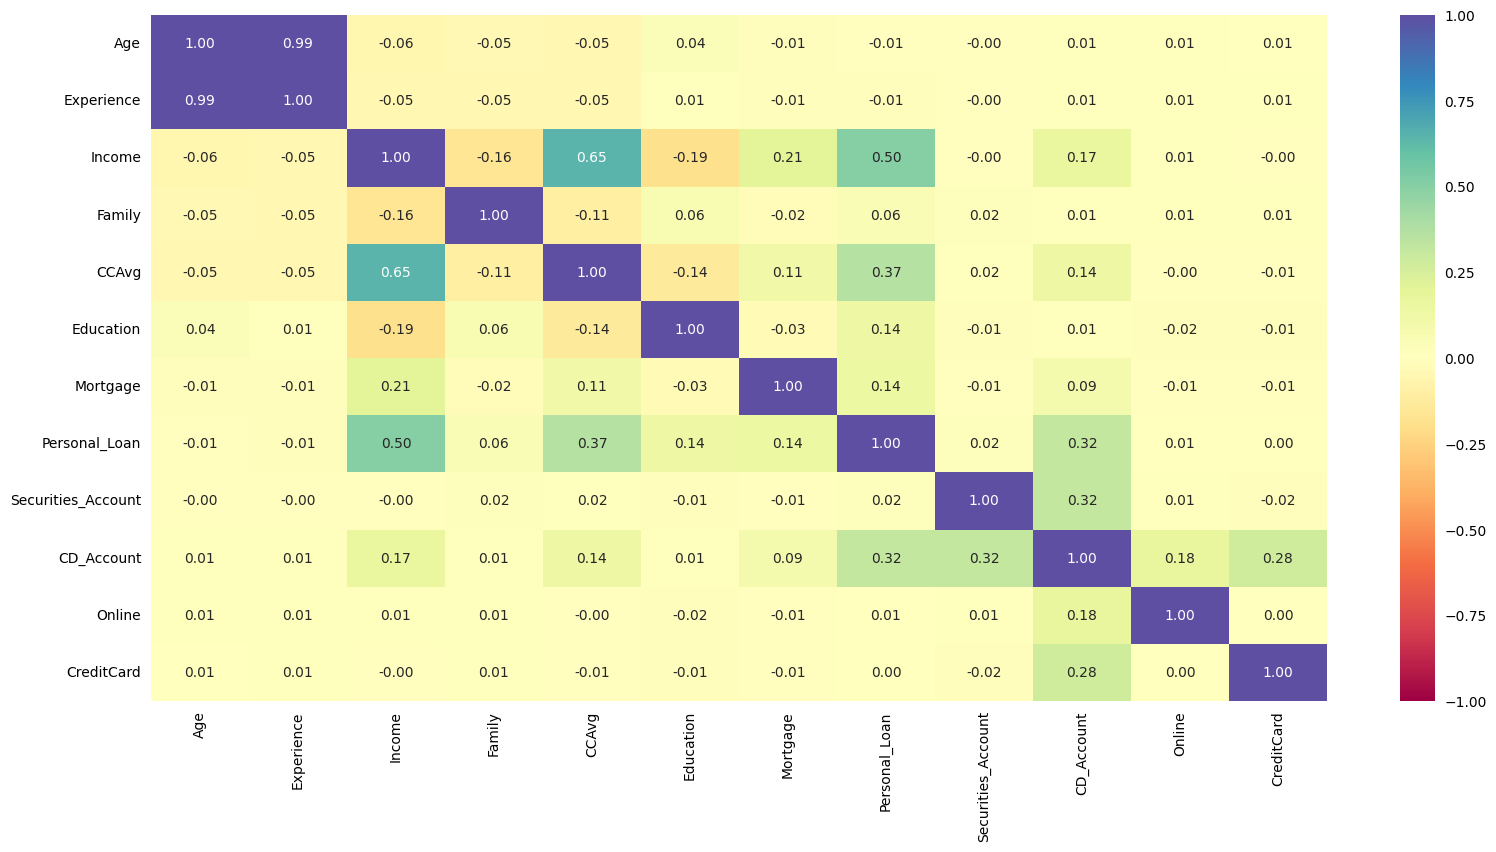

By Sweta Prasad

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

 As a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Loading libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# To tune different models
from sklearn.model_selection import GridSearchCV
# To get diferent metric scores
from sklearn.metrics import (
f1_score,
accuracy_score,
recall_score,
precision_score,
confusion_matrix,
roc_auc_score,
confusion_matrix,
precision_recall_curve,
roc_curve,
make_scorer,
)
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'Brown'} # for plot title
# import requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

## Loading the dataset

In [ ]:
Loan = pd.read_csv("/content/Loan_Modelling.csv") ##  Complete the code to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
df = Loan.copy()

In [ ]:
df

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### View the first and last 5 rows of the dataset.

In [ ]:
df.head() ##  Complete the code to view top 5 rows of the data

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
df.tail() ##  Complete the code to view last 5 rows of the data

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Understand the shape of the dataset.

In [ ]:
df.shape ##  Complete the code to view dimensions of the data

(5000, 14)

There is 5000 rows and 14 columns in this dataset.


### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Dataset has 5000 datapoints. Dataset has 14 columns including:
13 columns by int64 type: ID, Age, Experience, Income, ZIP Code, Family, Education, Moragage, Personal Loan, Securities Account, CD Account,
Online and CreditCard
1 column by float: CCAvg
Target is Personal Loan column and other columns are features. It seems that there is no missing value, but there may be invalid values, so we
will check this case further.

### Checking the Statistical Summary

In [ ]:
df.describe().T  ## Complete the code to get the statistical summary of the data

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

Here we have negative value value which is ilogical

## Data Preprocessing

In [ ]:
#data types
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Here CCAvg is float type because it repreasents decimal.

In [ ]:
 #find negative values in Experience columns
 df[df["Experience"] < 0]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
89      90   25          -1     113    94303       4   2.30          3   
226    227   24          -1      39    94085       2   1.70          2   
315    316   24          -2      51    90630       3   0.30          3   
451    452   28          -2      48    94132       2   1.75          3   
524    525   24          -1      75    93014       4   0.20          1   
536    537   25          -1      43    92173       3   2.40          2   
540    541   25          -1     109    94010       4   2.30          3   
576    577   25          -1      48    92870       3   0.30          3   
583    584   24          -1      38    95045       2   1.70          2   
597    598   24          -2     125    92835       2   7.20          1   
649    650   25          -1      82    92677       4   2.10          3   
670    671   23          -1      61    92374       4   2.60          1   
686    687   24          -1      38    92612       4   0.60          2   
793    794   24          -2     150    94720       2   2.00          1   
889    890   24          -2      82    91103       2   1.60          3   
909    910   23          -1     149    91709       1   6.33          1   
1173  1174   24          -1      35    94305       2   1.70          2   
1428  1429   25          -1      21    94583       4   0.40          1   
1522  1523   25          -1     101    94720       4   2.30          3   
1905  1906   25          -1     112    92507       2   2.00          1   
2102  2103   25          -1      81    92647       2   1.60          3   
2430  2431   23          -1      73    92120       4   2.60          1   
2466  2467   24          -2      80    94105       2   1.60          3   
2545  2546   25          -1      39    94720       3   2.40          2   
2618  2619   23          -3      55    92704       3   2.40          2   
2717  2718   23          -2      45    95422       4   0.60          2   
2848  2849   24          -1      78    94720       2   1.80          2   
2876  2877   24          -2      80    91107       2   1.60          3   
2962  2963   23          -2      81    91711       2   1.80          2   
2980  2981   25          -1      53    94305       3   2.40          2   
3076  3077   29          -1      62    92672       2   1.75          3   
3130  3131   23          -2      82    92152       2   1.80          2   
3157  3158   23          -1      13    94720       4   1.00          1   
3279  3280   26          -1      44    94901       1   2.00          2   
3284  3285   25          -1     101    95819       4   2.10          3   
3292  3293   25          -1      13    95616       4   0.40          1   
3394  3395   25          -1     113    90089       4   2.10          3   
3425  3426   23          -1      12    91605       4   1.00          1   
3626  3627   24          -3      28    90089       4   1.00          3   
3796  3797   24          -2      50    94920       3   2.40          2   
3824  3825   23          -1      12    95064       4   1.00          1   
3887  3888   24          -2     118    92634       2   7.20          1   
3946  3947   25          -1      40    93117       3   2.40          2   
4015  4016   25          -1     139    93106       2   2.00          1   
4088  4089   29          -1      71    94801       2   1.75          3   
4116  4117   24          -2     135    90065       2   7.20          1   
4285  4286   23          -3     149    93555       2   7.20          1   
4411  4412   23          -2      75    90291       2   1.80          2   
4481  4482   25          -2      35    95045       4   1.00          3   
4514  4515   24          -3      41    91768       4   1.00          3   
4582  4583   25          -1      69    92691       3   0.30          3   
4957  4958   29          -1      50    95842       2   1.75          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
89          

Assumed that negetive data in Experience was actually positve, and convert the negative numbers to positive numbers.

In [ ]:
#convert above 52 rows to positive value
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
df


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [ ]:

#checking the missing values
df.isna().sum().to_frame().T



ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   0    0           0       0        0       0      0          0         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   0           0       0           0

There are no null values found.
There are 5000 rows and 14 columns in dataset
Datatypes are flaot and int.

In [ ]:
 #check number of nunique values
df.nunique()


ID                    5000
Age                     45
Experience              44
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")


ID has 5000 unique value
Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
ZIPCode has 467 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal_Loan has 2 unique value
Securities_Account has 2 unique value
CD_Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [ ]:
#Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
--------------------------------------------------
Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal_Loan:
Personal_Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities_Account:
Securities_Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD_Account:
CD_Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online:
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard:
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
df.duplicated().sum()

0

There is no duplicates data.


In [ ]:
# checking the number of uniques in the zip code
df["ZIPCode"].nunique()

467

Zipcode is to find the location of the customer. There are total numnber 467 zipcodes and it condsider as the category. We will use te zipcode
library to get corresponding counties.
The booking ID, Zipcoe columns are not required, so dropping this from the dataset

In [ ]:
#drop ID columns
df.drop(['ID','ZIPCode'], axis=1, inplace=True)

In [ ]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

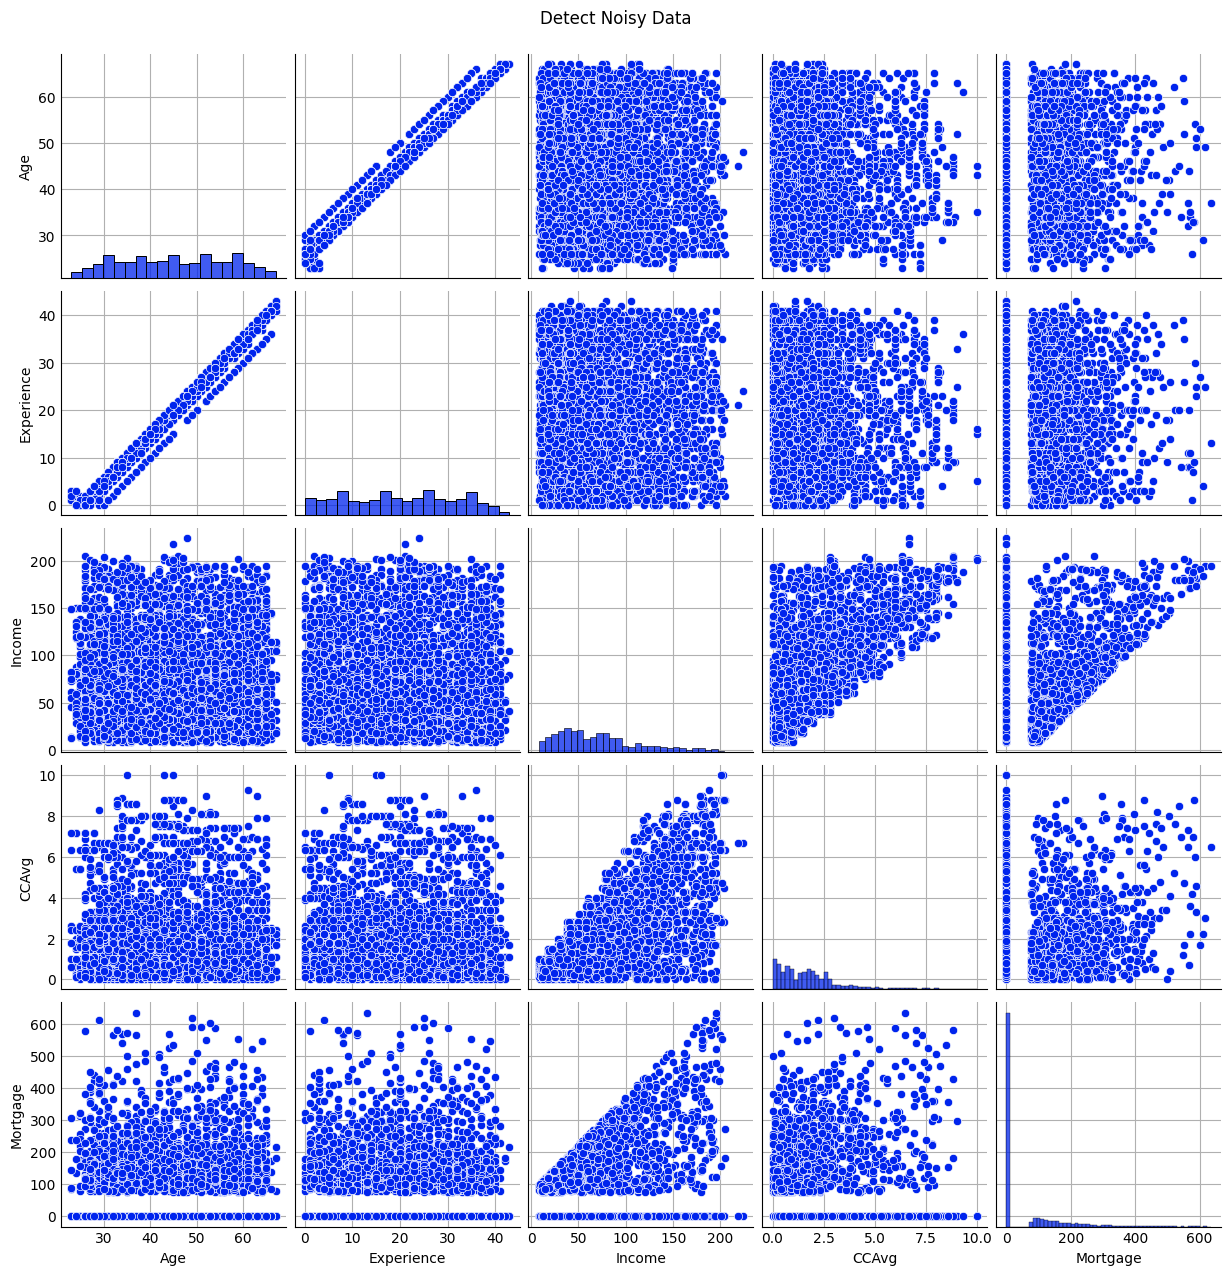

In [ ]:
#Check outliers and noisy data. For this step we use scatter plot and box plot
# check noisy data
%matplotlib inline
sns.set_palette('winter')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noisy Data', y=1.02)
plt.show()

The Income column expresses the annual income, while the CCAvg column expresses the Avg. spending on credit cards per month, so to
standardize the units of the columns, we convert the annual income to monthly

In [ ]:
# convert annual income to monthly with divide by 12
df['Income'] = round(df['Income']/12, 2)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

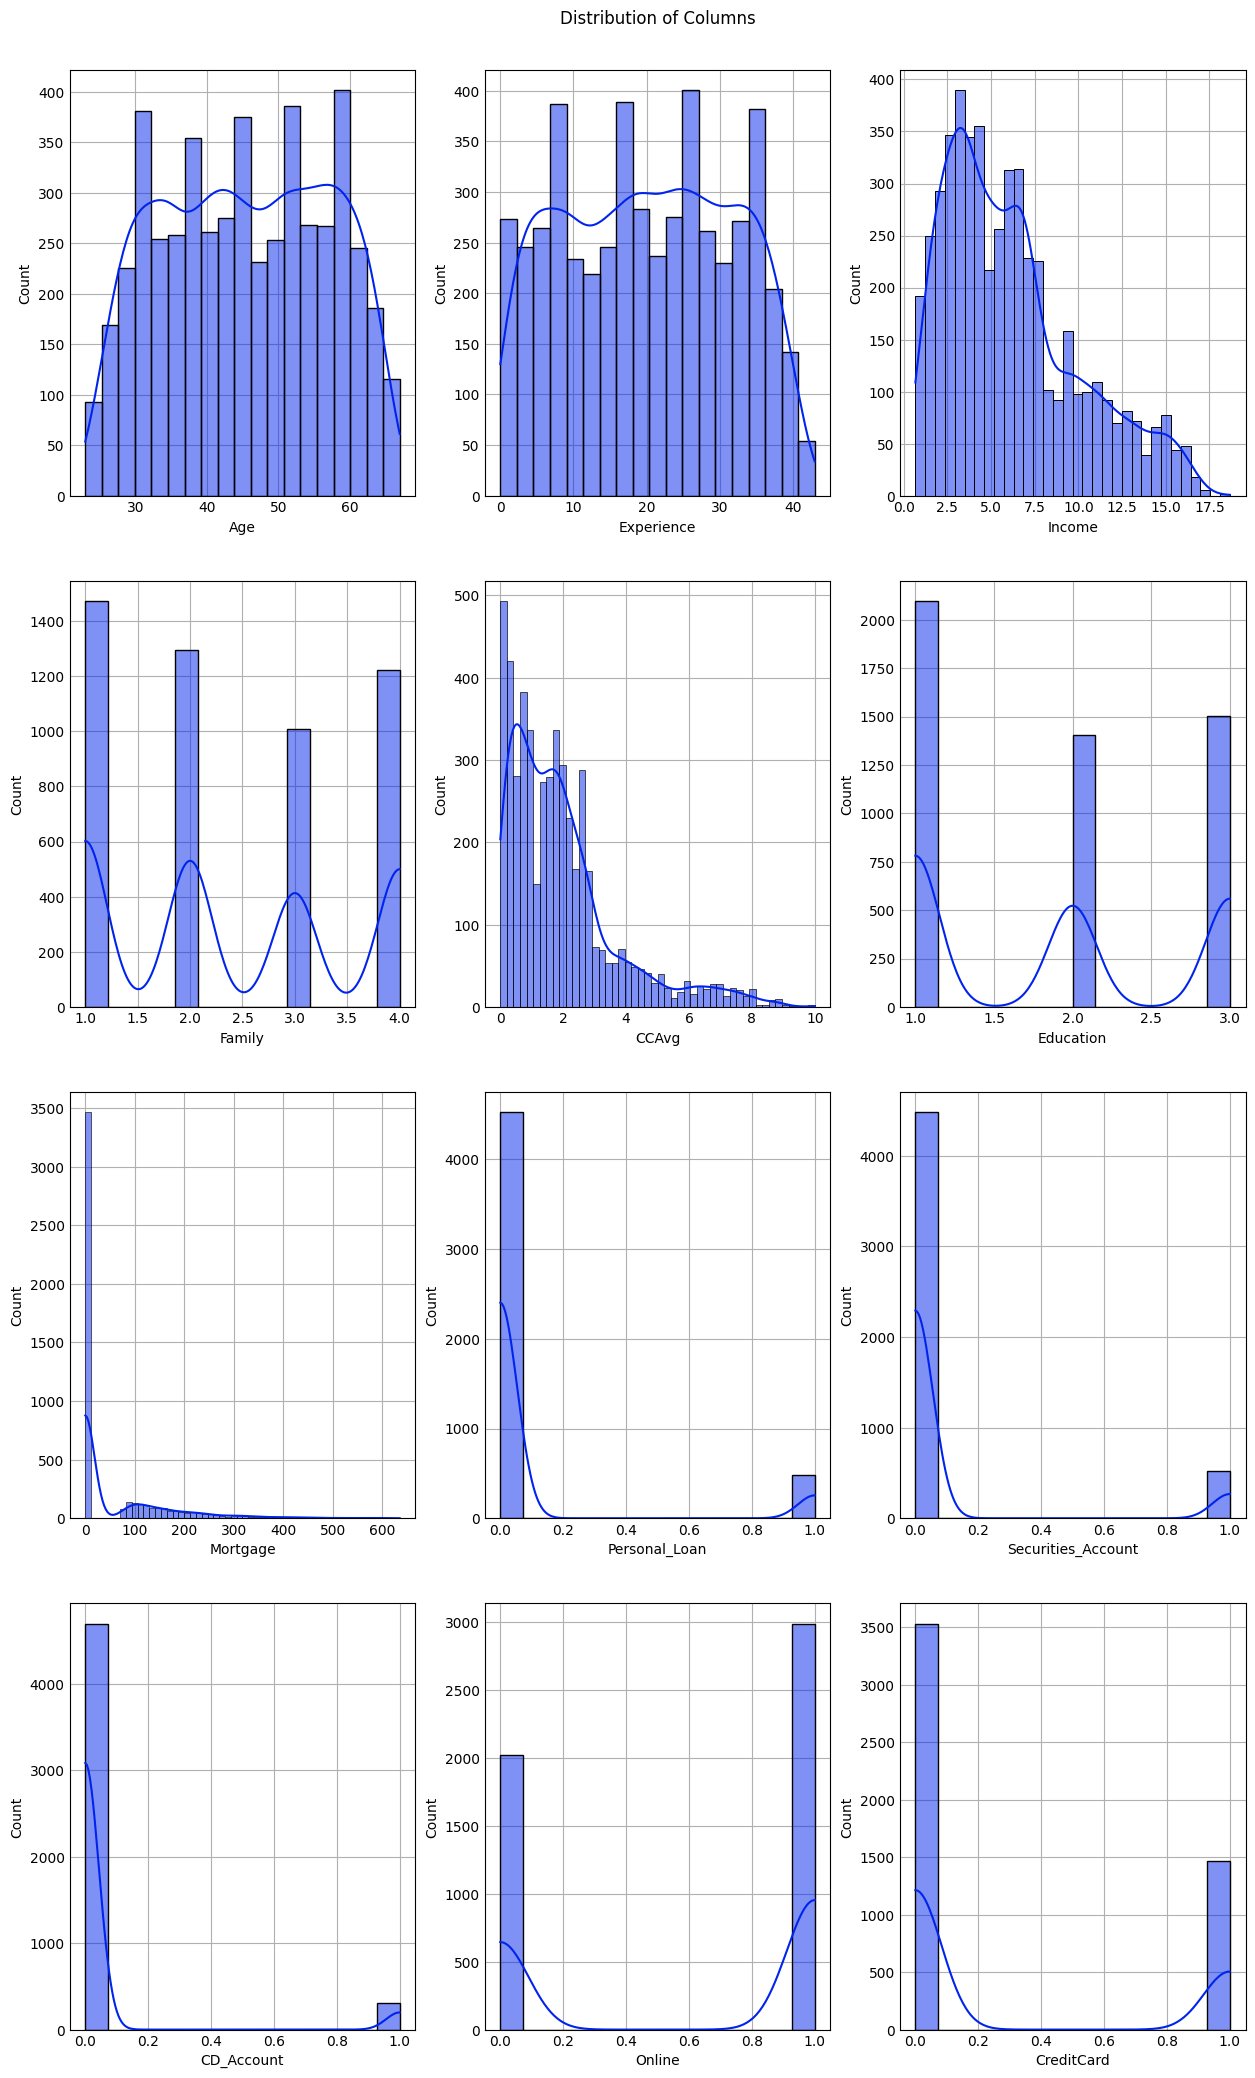

In [ ]:
# check distribution Scatter matrix (splom) with go.Splom
sns.set_palette('winter')
fig, ax = plt.subplots(4,3,figsize=(12,20))
for i, col in enumerate(df):
      sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns',y=1.02)
plt.show()

**5.1 Univariate Analysis**
- Analysis of categorical data
- Analysis of Numerical data

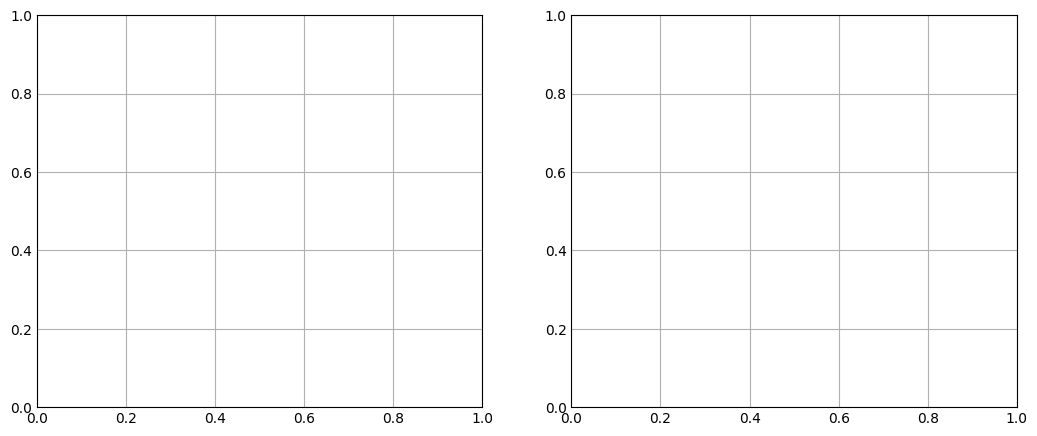

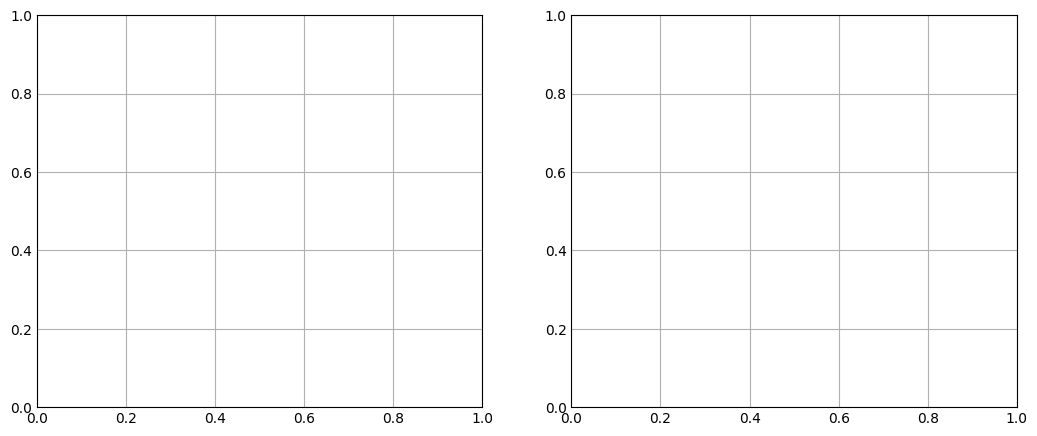

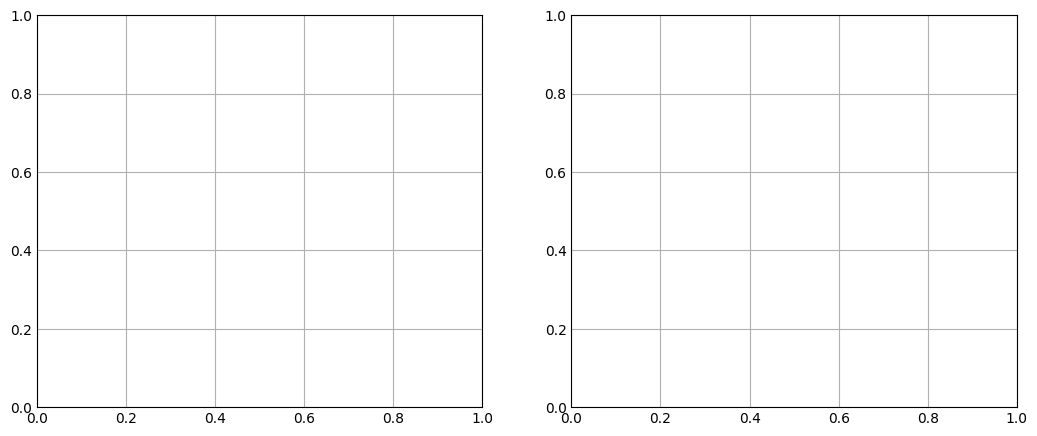

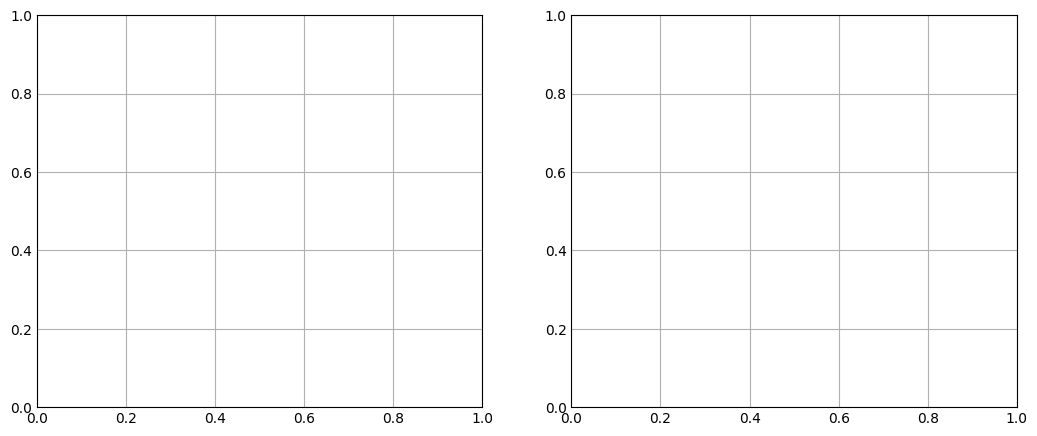

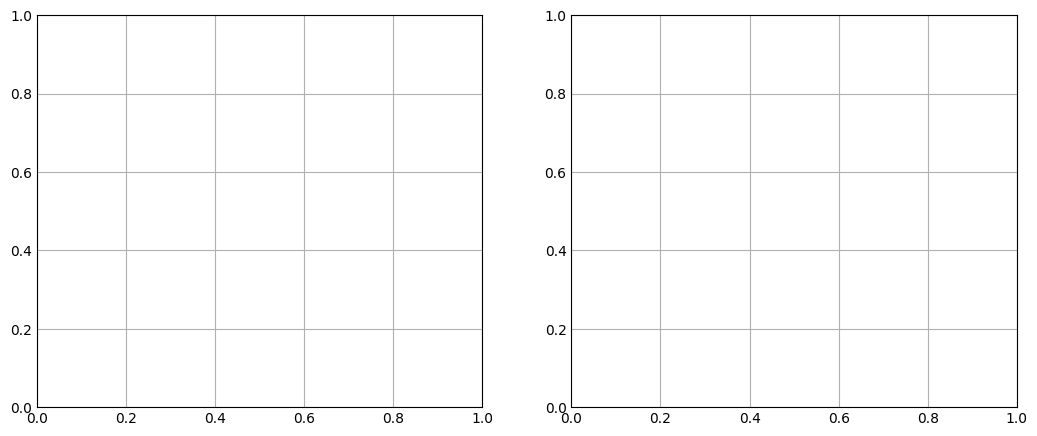

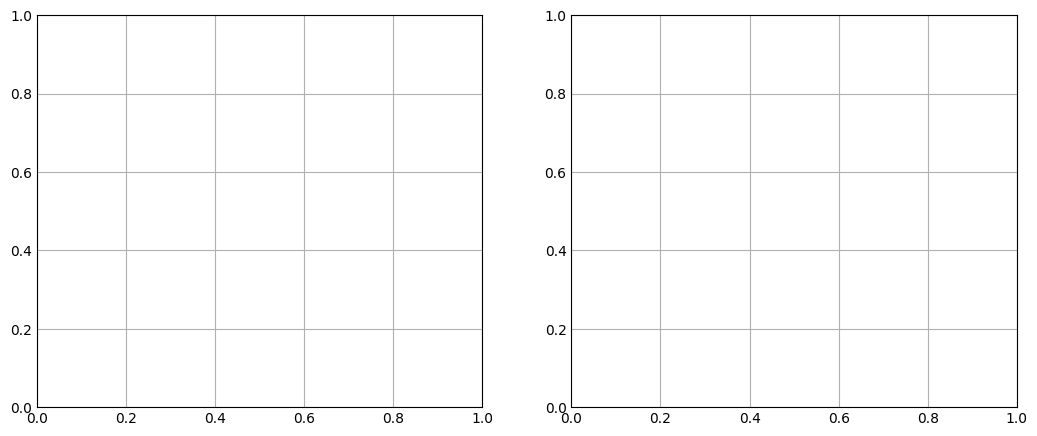

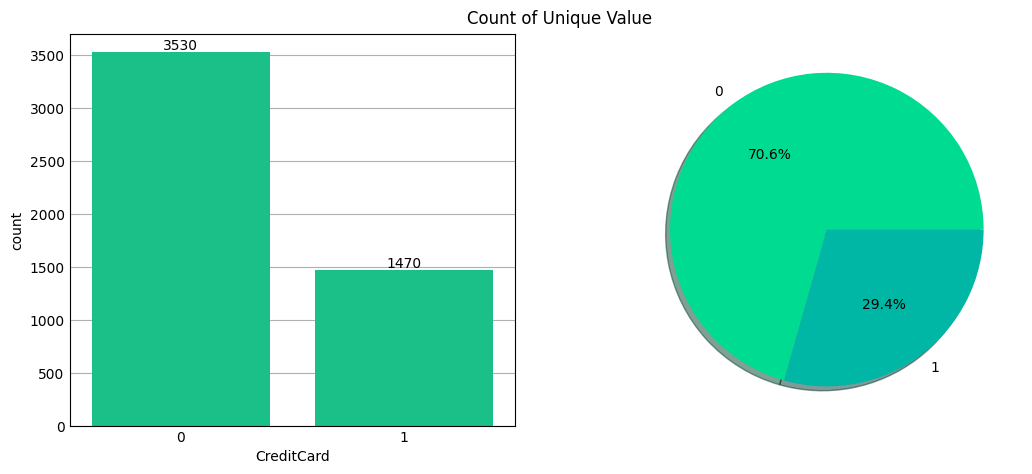

In [ ]:
#univariate analysis of categorical data:
sns.set_palette("winter_r")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))
# count of col (countplot)
sns.countplot(data=df, x=col, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
# count of col (pie chart)
slices = df[col].value_counts().sort_index().values
activities = [var for var in df[col].value_counts().sort_index().index]
axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')
plt.suptitle('Count of Unique Value', y=1.05 )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

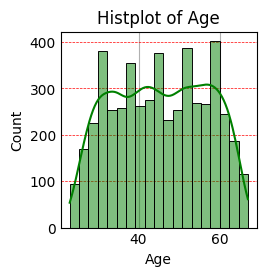

In [ ]:
sns.histplot(data=df, x= 'Age', kde=True, color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histplot of Age')
plt.grid(axis = 'y', color = 'red', linestyle = '--', linewidth = 0.5)
plt.show

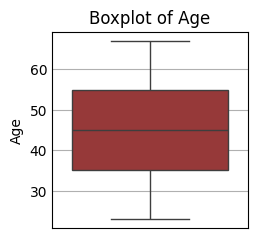

In [ ]:
sns.boxplot(data=df,y='Age', color='brown') ## Boxplot for the Age
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show()

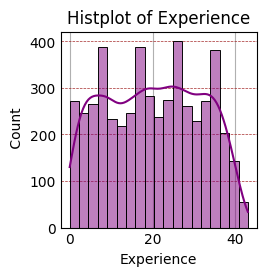

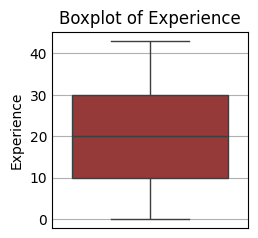

In [ ]:
#Create a histogram and boxplot for experience
sns.histplot(data=df, x='Experience',kde=True, color='purple')
# Histogram for Experience
plt.xlabel('Experience')
plt.ylabel(' Count')
plt.title('Histplot of Experience')
plt.grid(axis = 'y', color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()
sns.boxplot(data=df,y='Experience', color='brown') ## Boxplot for the cost of order
plt.ylabel('Experience')
plt.title('Boxplot of Experience')
plt.show()

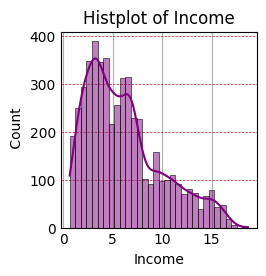

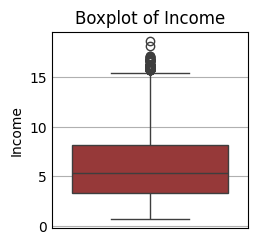

In [ ]:
#Create a histogram and boxplot for Income
sns.histplot(data=df, x='Income',kde=True, color='purple')
# Histogram for Income
plt.xlabel('Income')
plt.ylabel(' Count')
plt.title('Histplot of Income')
plt.grid(axis = 'y', color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()
#boxplotfor income
sns.boxplot(data=df,y='Income', color='brown') ## Boxplot for the cost of order
plt.ylabel('Income')
plt.title('Boxplot of Income')
plt.show()

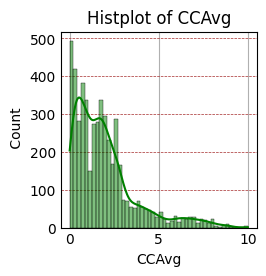

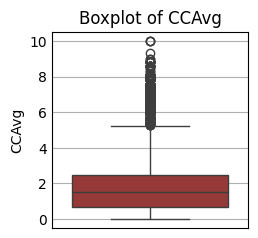

In [ ]:
## Complete the code to create histogram_boxplot for CCAvg
#Create a histogram and boxplot for CCAvg
# Histogram for CCAvg
sns.histplot(data=df, x='CCAvg',kde=True, color='green')
plt.xlabel('CCAvg')
plt.ylabel(' Count')
plt.title('Histplot of CCAvg')
plt.grid(axis = 'y', color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()

#Boxplot of CCAvg
sns.boxplot(data=df,y='CCAvg', color='brown') ## Boxplot for the cost of order
plt.ylabel('CCAvg')
plt.title('Boxplot of CCAvg')
plt.show()

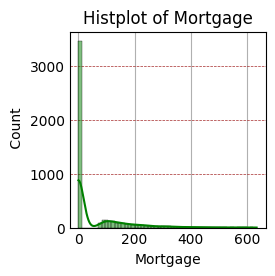

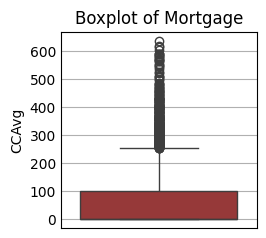

In [ ]:
# Complete the code to create histogram_boxplot for Mortgage
#Histogram for Mortgage
sns.histplot(data=df, x='Mortgage',kde=True, color='green')
plt.xlabel('Mortgage')
plt.ylabel(' Count')
plt.title('Histplot of Mortgage')
plt.grid(axis = 'y', color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()
#Boxplot of Mortgage
sns.boxplot(data=df,y='Mortgage', color='brown') ## Boxplot for the cost of order
plt.ylabel('CCAvg')
plt.title('Boxplot of Mortgage')
plt.show()

** Categorical data & Numerical data**

- Family, Edcuation, Personal Loan, Securites Account, CD Account, Online,CreditCard are categorical data of univariate analysis.
Age, Experience, Income, CCAvg, and Mortgage are numerical data ofunivariate analysis.
- As from above plols and table:
Customers with the number of Family 1 and the number of Family 3 respectively have the highest frequency and the lowest frequency, but
in general, the customers with the number of Family 1, 2, 3, and 4 are almost equally distributed in the dataset
- The customers who did not accept a Personal Loan are much more than the customers who accepted a Personal Loan, and therefore
there is an imbalance in the classes, so we must be careful to consider the imbalance in the model section for resampling the data.
Most of the bank's customers have education level 1 i.e. Undergrad .
Most of the bank's customers (90.4%) did not accept the personal loan offer
- Most of the bank's customers (89.6%) did not have a Securities Account
- Most of the bank's customers (94%) did not have a CD Account
- Most of the bank's customers (59.7%) used internet banking facilities
- Most of the bank's customers (70.6%) did not use a credit card issued by Universal Bank
- The Age range of customers is between 23 and 67 years. The average age of customers is almost 45.
The Experience range of customers is between 0 and 43 years. The mean age of customers is almost 20.
- The age and experience columns have a similar distribution. Also, the column of income, mortgage and average distribution are almost
similar, all of them are skewed to the right.
- The average income of the bank's customers per month is approximately 6 thousand dollars and its range is between 0.67 and 18.67
thousand dollars. CCAvg of the bank's customers per month is approximately 1.94 thousand dollars and its range is between 0 and 10
thousand dollars.
- Observation on Univariate Analysis
The average Mortgage of the bank's customers is approximately 56 thousand dollars and its range is between 0 and 635 thousand
dollars.


**5.2 Bivariate Analysis**


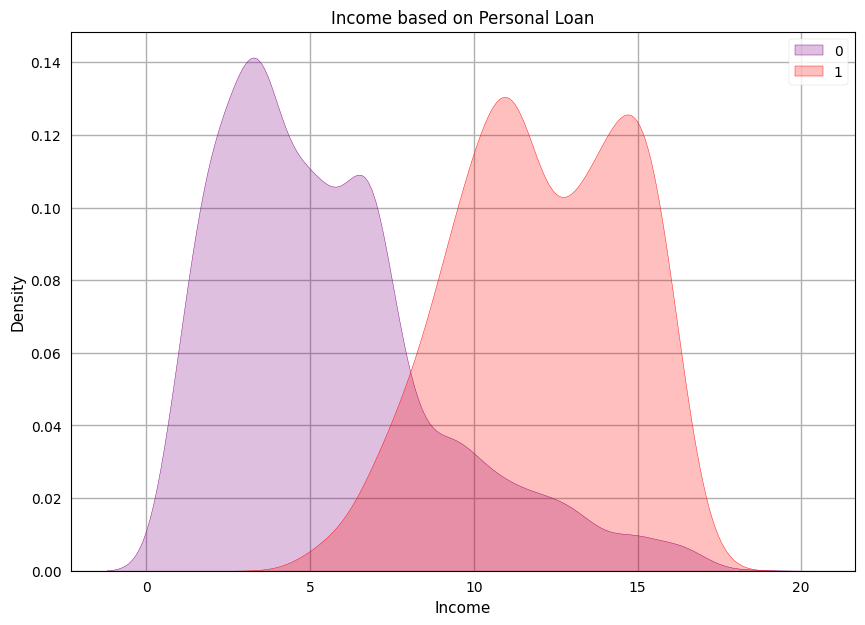

In [ ]:
# check distribution of Income (based on Personal Loan)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set_palette(['purple','red'])
for j, col in enumerate(['Income']):
    for i, label in enumerate(df['Personal_Loan'].unique().tolist()):

     sns.kdeplot(df.loc[df['Personal_Loan'] == label, col], label=label, shade=True)
plt.title('Income based on Personal Loan')
plt.legend()
plt.show()


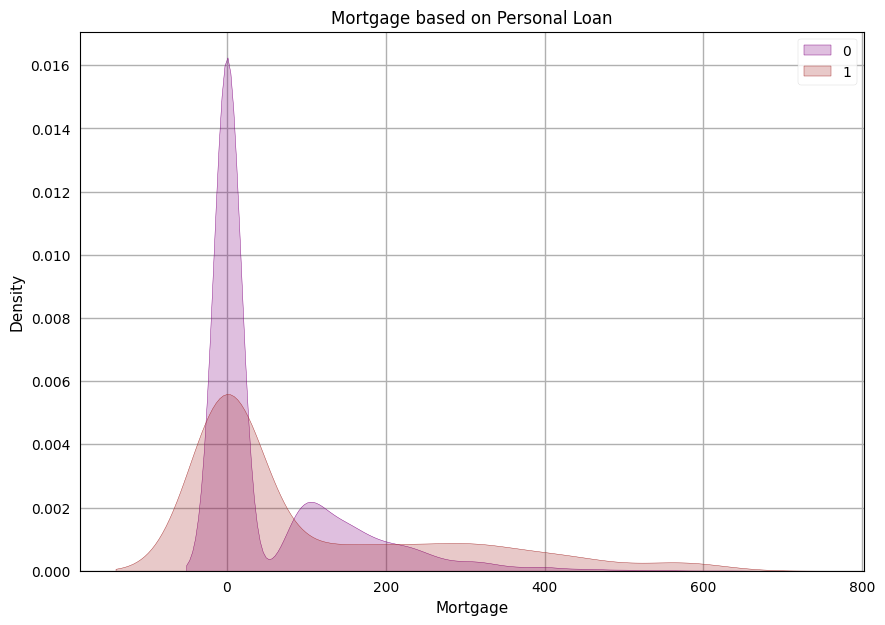

In [ ]:
# check distribution of Income (based on Personal Loan)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set_palette(['purple','brown'])
for j, col in enumerate(['Mortgage']):
     for i, label in enumerate(df['Personal_Loan'].unique().tolist()):

            sns.kdeplot(df.loc[df['Personal_Loan'] == label, col], label=label, shade=True)
plt.title('Mortgage based on Personal Loan')
plt.legend()
plt.show()

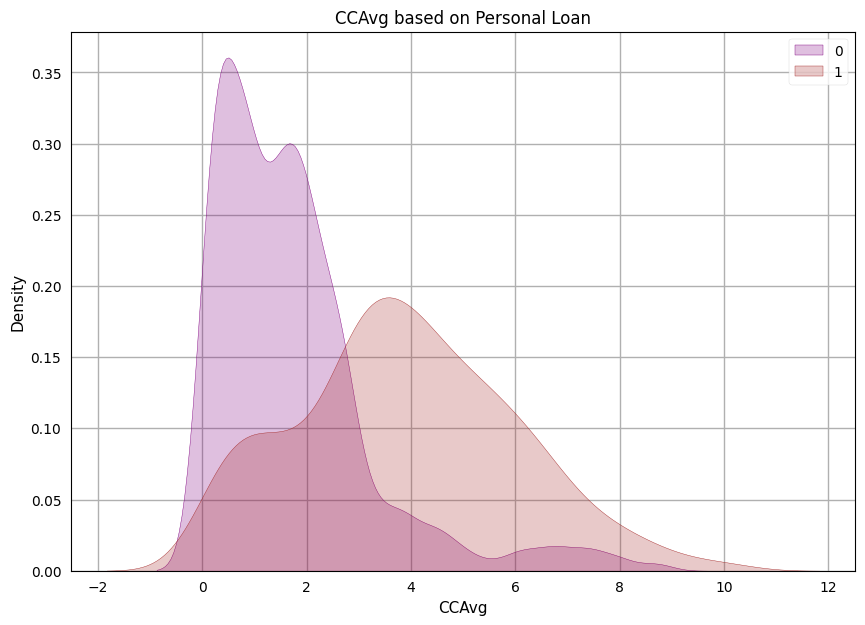

In [ ]:
# check distribution of Income (based on Personal Loan)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set_palette(['purple','brown'])
for j, col in enumerate(['CCAvg']):
    for i, label in enumerate(df['Personal_Loan'].unique().tolist()):

           sns.kdeplot(df.loc[df['Personal_Loan'] == label, col], label=label, shade=True)
plt.title('CCAvg based on Personal Loan')
plt.legend()

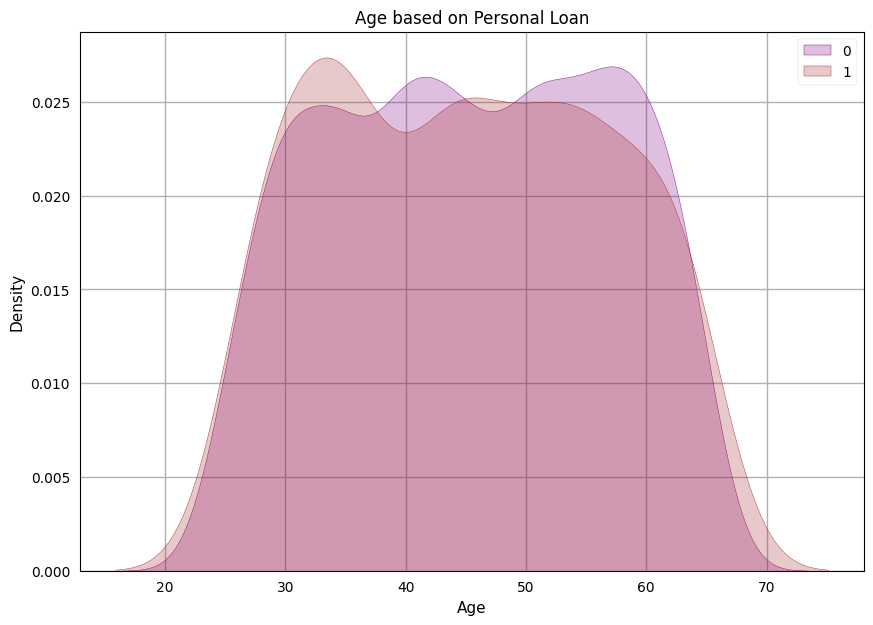

In [ ]:
# check distribution of Income (based on Personal Loan)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set_palette(['purple','brown'])
for j, col in enumerate(['Age']):
        for i, label in enumerate(df['Personal_Loan'].unique().tolist()):

                sns.kdeplot(df.loc[df['Personal_Loan'] == label, col], label=label, shade=True)
plt.title('Age based on Personal Loan')
plt.legend()
plt.show()

**According to above plots**:
- The Income of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan.
Approximately, people whose monthly Income is more than 8000 dollars have accepted a bank loan.
- Majority of people who accepted a bank loan had mortgage euqal to zero
- The CCAvg of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. Nearly,
people whose CCAvg is more than 3 thousand dollars have accepted a bank loan
- Here it looks like that age does not have much influence in determining whether or not to accept a bank loan

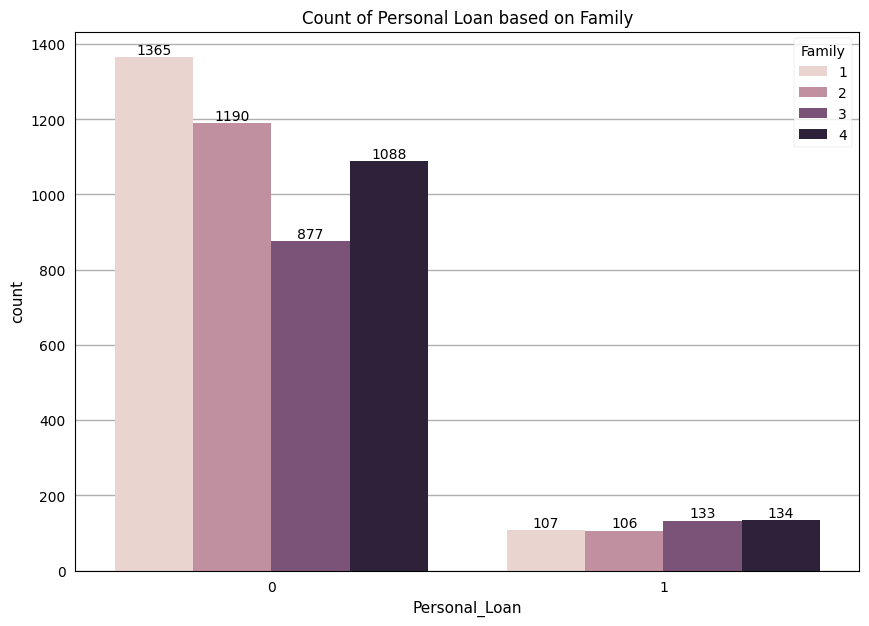

In [ ]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['green','pink','purple','yellow'])
discrete_cols2 = ['Family']
for i, col in enumerate(discrete_cols2):
  ax = sns.countplot(data=df, x='Personal_Loan', hue=col)
  for container in ax.containers:
         ax.bar_label(container)
plt.title('Count of Personal Loan based on Family')
#plt.title(f'Count of Personal_Loan based on {col} (Fig {i+5})', fontdict=FONT, pad=15)
plt.show()

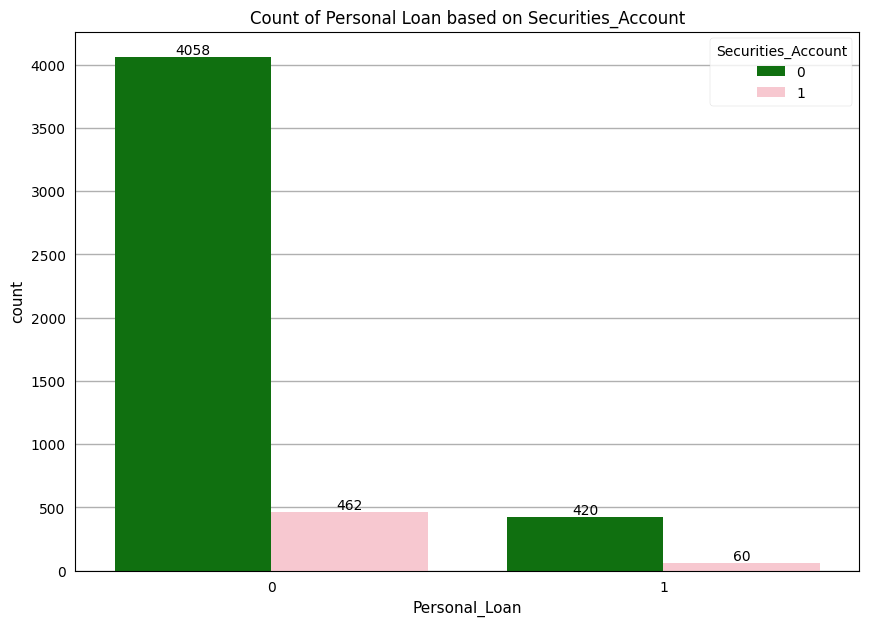

In [ ]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['green','pink','purple','yellow'])
discrete_cols2 = ['Securities_Account']
for i, col in enumerate(discrete_cols2):
  ax = sns.countplot(data=df, x='Personal_Loan', hue=col)
  for container in ax.containers:

          ax.bar_label(container)
plt.title('Count of Personal Loan based on Securities_Account')
plt.show()

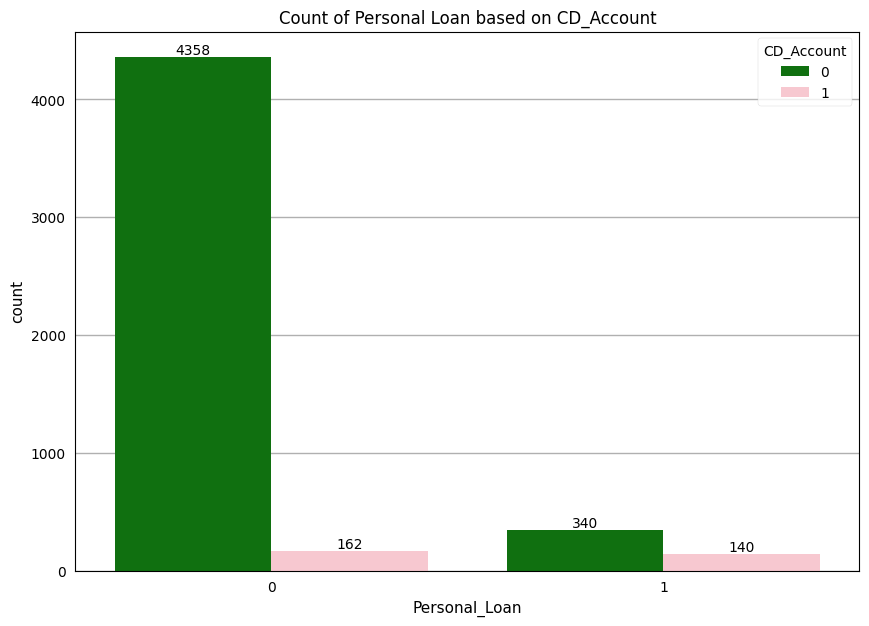

In [ ]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['green','pink','purple','yellow'])
discrete_cols2 = ['CD_Account']
for i, col in enumerate(discrete_cols2):
  ax = sns.countplot(data=df, x='Personal_Loan', hue=col)
  for container in ax.containers:
              ax.bar_label(container)
plt.title('Count of Personal Loan based on CD_Account')
plt.show()

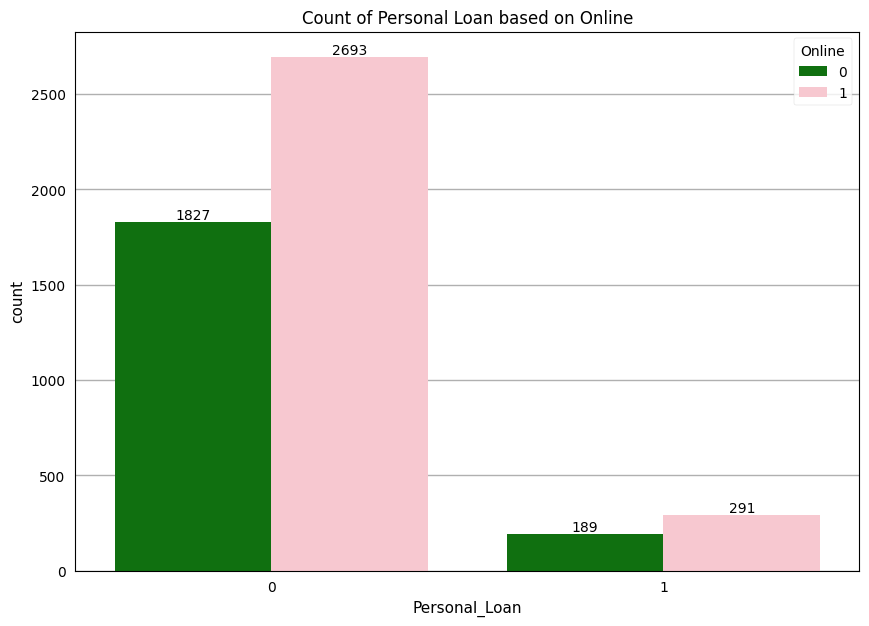

In [ ]:
 #count of purchased based on Gender
%matplotlib inline
sns.set_palette(['green','pink','purple','yellow'])
discrete_cols2 = ['Online']
for i, col in enumerate(discrete_cols2):
  ax = sns.countplot(data=df, x='Personal_Loan', hue=col)
  for container in ax.containers:

         ax.bar_label(container)
plt.title('Count of Personal Loan based on Online')
plt.show()

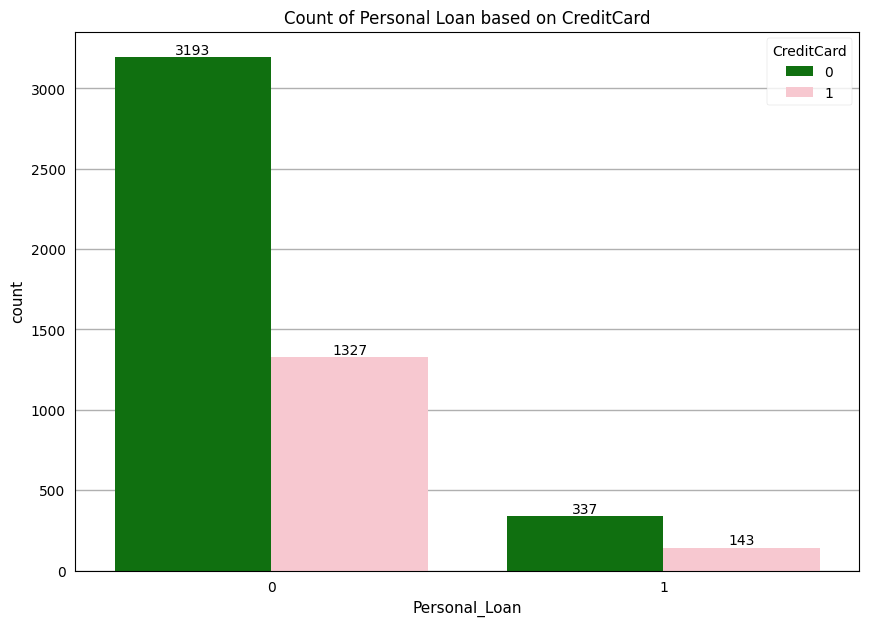

In [ ]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['green','pink','purple','yellow'])
discrete_cols2 = ['CreditCard']
for i, col in enumerate(discrete_cols2):
  ax = sns.countplot(data=df, x='Personal_Loan', hue=col)
  for container in ax.containers:
        ax.bar_label(container)
plt.title('Count of Personal Loan based on CreditCard')
plt.show()

**According to above plots:**
- Among the people who did not accept the personal loan, most of them had a family equal to 1, but among the people who accepted the
personal loan, there is almost no difference in terms of family
- The people who did not accept the personal loan, most of them had an Education of 1, and the people who accepted the personal loan,
the Education was mostly 3 or 2
- Majority of the people, both those who accepted the personal loan and those who did not, did not have a Securities Account
- Mojrity of the people, both those who accepted the personal loan and those who did not, did not have a CD Account
- Majority of the people, both those who accepted the personal loan and those who did not, used online banking facilities
- Majority of the people, both those who accepted the personal loan and those who did not, did not use a Creditcard


<Figure size 2000x2000 with 0 Axes>

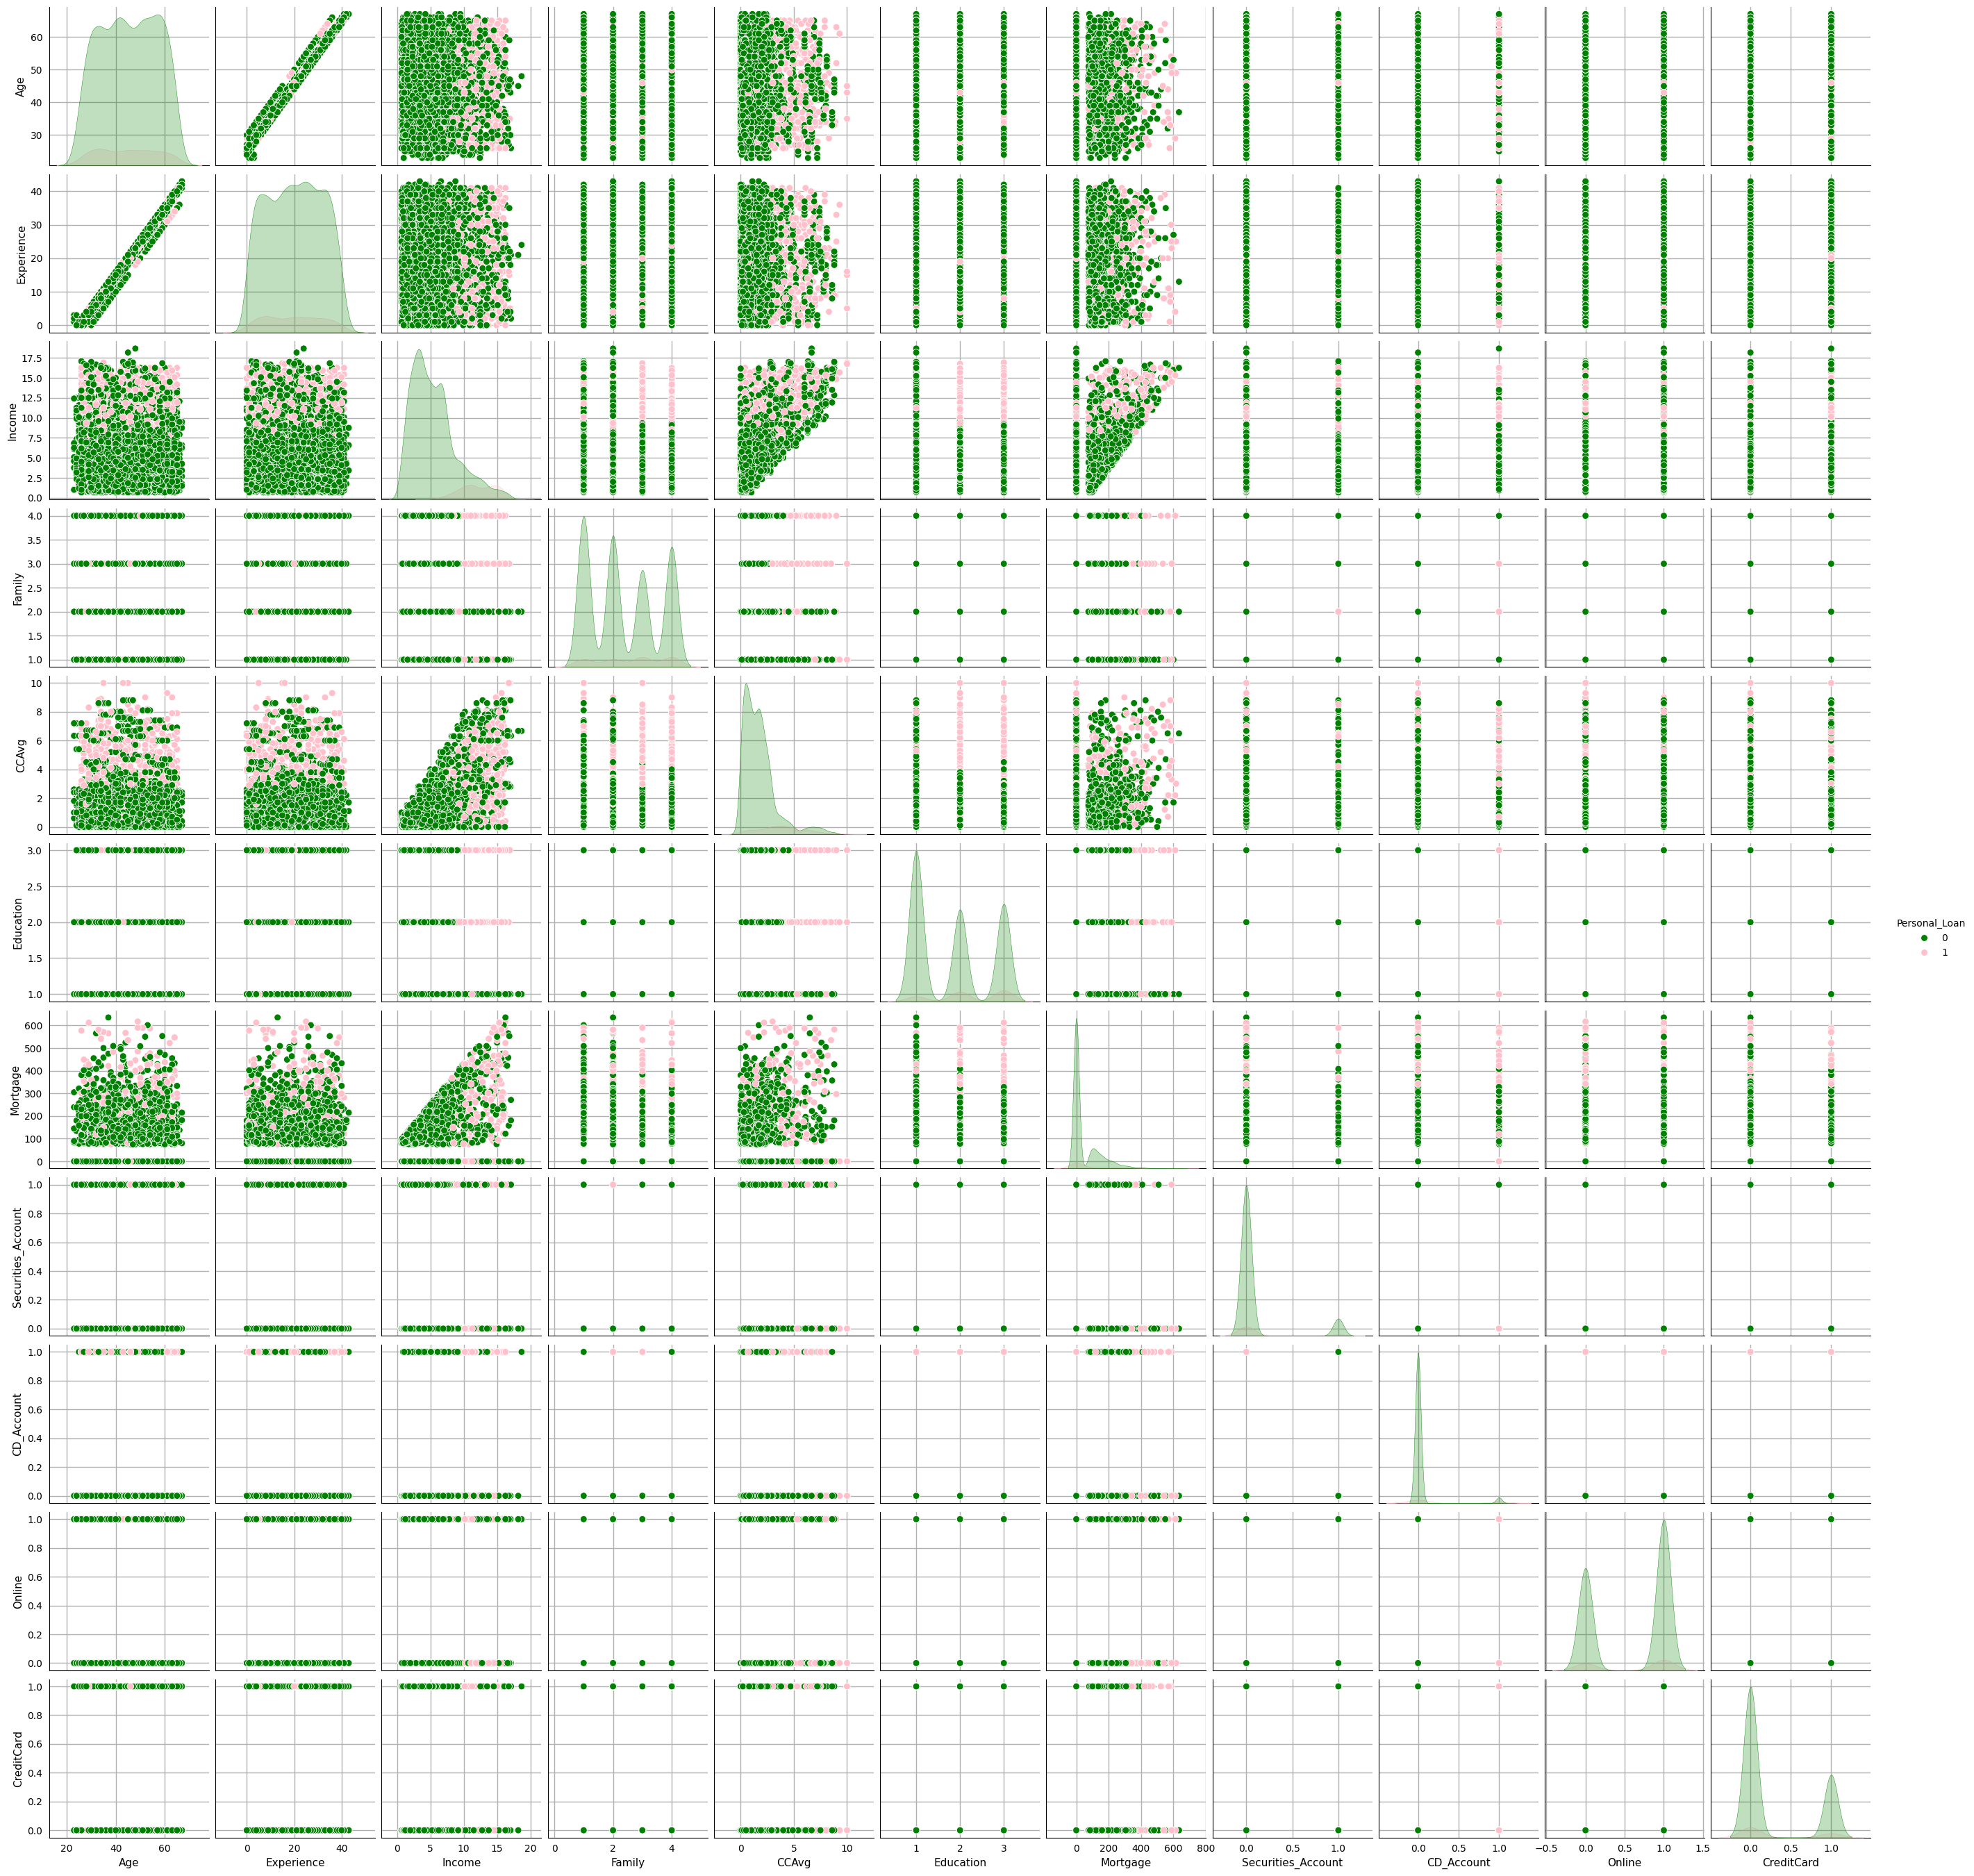

In [ ]:
#simple pair plot to view if there is correlation between the data set variables
plt.figure(figsize=(20,20))
sns.pairplot(df, hue="Personal_Loan")
plt.show()

Observations:
- The red spots present the customers who accepted a personal_loan and the green spots show the ones who did not.
- From the univariate analysis of the personal_loan dataset it was observed that only below 10% of the customers accepted the personal loan,
hence this observation is consistent with the pair plot where the majority of the spots are green
- It is observed that there is a very strong linear corelation between Age and Experience
- It is observed that there is a slight correlation between Income and CCAvg High concentraion of customers who accepted a personal loan are
observed at:
- Higher Income level (starting at approx USD 100K and above)
- Higher CCAvg (starting at approx USD 3K and above)
- Higher Mortgage value (starting at approx USD 300K and above)
Hence, we do have an idea to expect the abova variables to have a medium to high prediction power on the classification models.

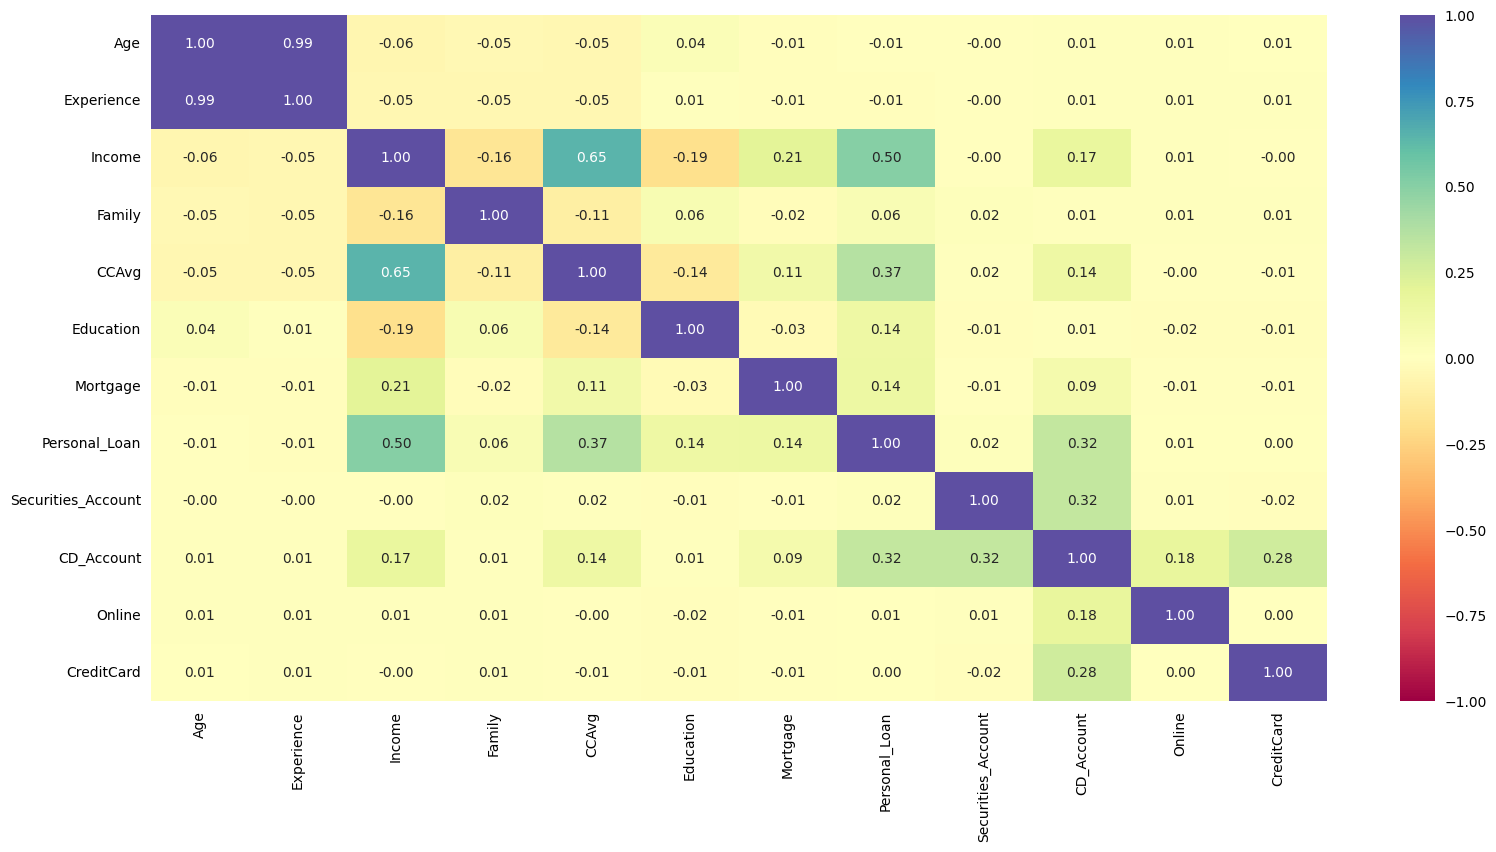

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

The correlation heatmap supports the correlation observed in the pairplot where:
The correlation between Age and Experience is very high (value = 0.99)
The correlation between Income and CCAvg is low (value = 0.65)
All other correlation values are quiet small for consideration

In [ ]:
from os import stat
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="pink",
        stat="density",
)

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
         data=data[data[target] == target_uniq[1]],
         x=predictor,
         kde=True,
         ax=axs[0, 1],
         color="blue",
         stat="density",
)

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette="gist rainbow",
    )

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
         data=data,
         x=target,
         y=predictor,
         ax=axs[1, 1],
         showfliers=False,
         palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

df.columns





Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Age Vs Personal Loan

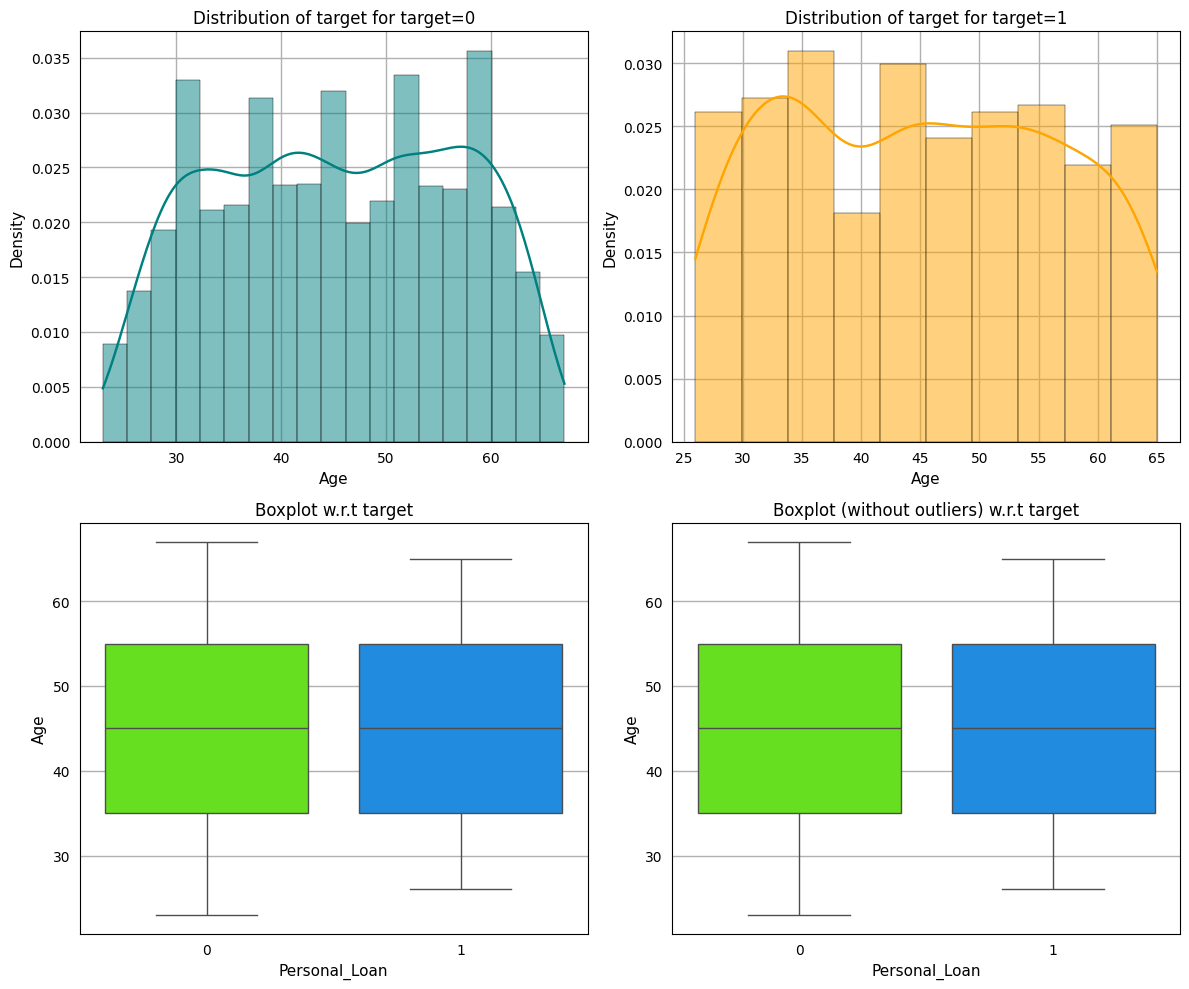

In [ ]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

The mean age for customers accepting and not accepting personal loans is very close to the value 45 years.
The pair plot Age does not have a relation with our target variable, hence a negligible prediction power


Experience VS Personal_Loan

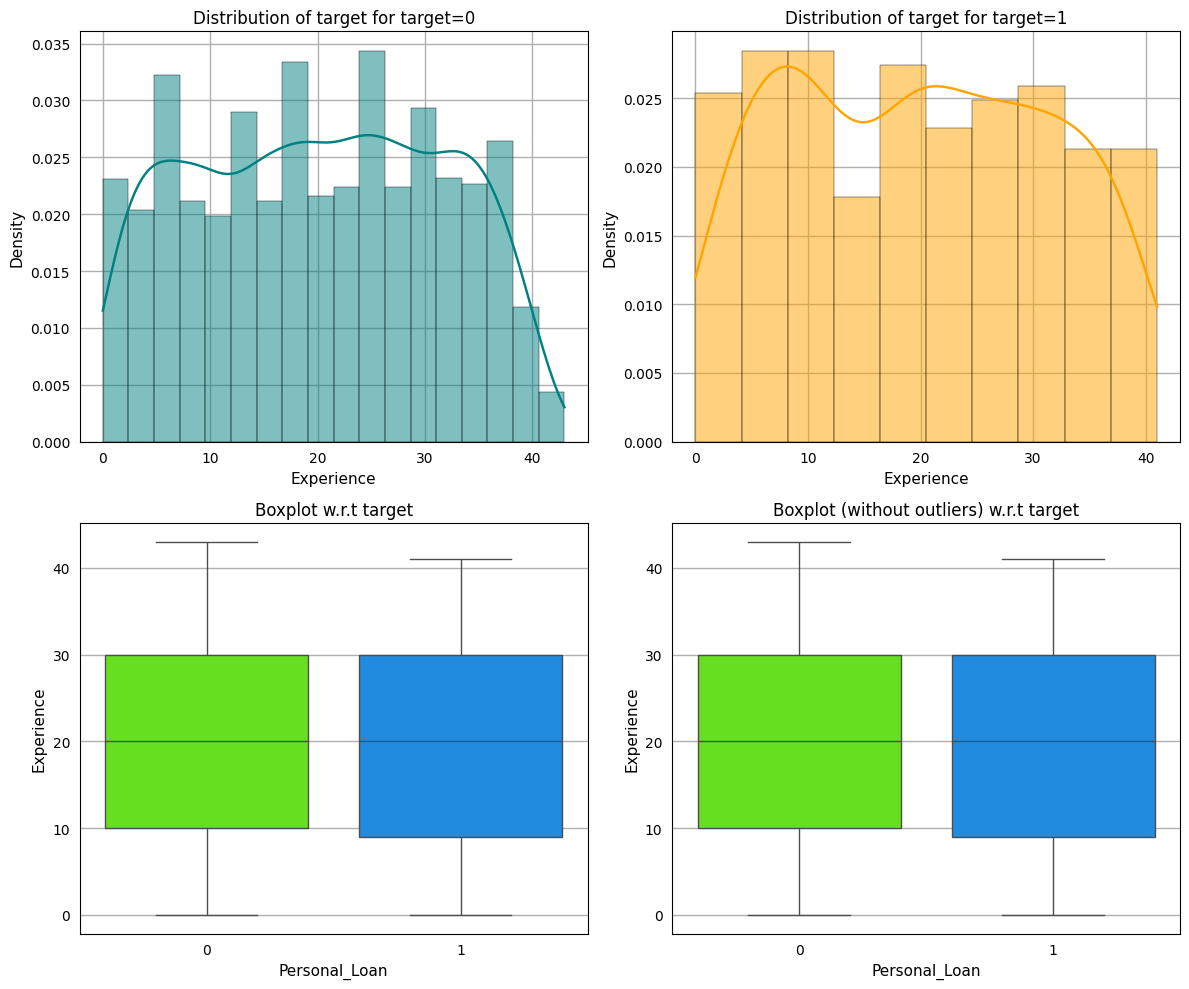

In [ ]:
distribution_plot_wrt_target(df,'Experience','Personal_Loan')

It is observed that the mean Experience for customers accepting and not accepting personal loans is very close to the value 20 years.
The pair plot, Experience does not have a relation hence a prediction power on our target variable

Income VS Personal_Loan

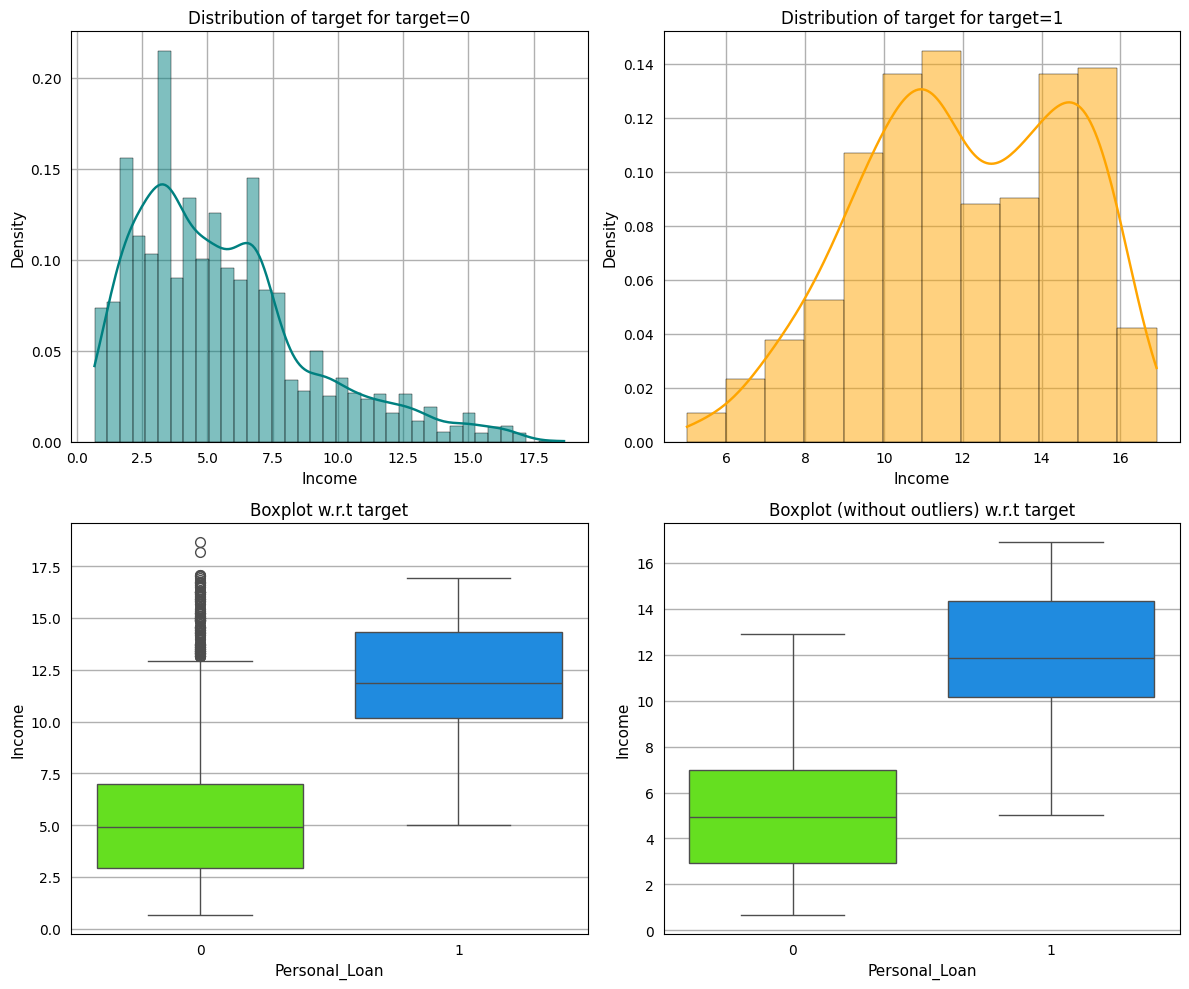

In [ ]:
distribution_plot_wrt_target(df,'Income','Personal_Loan')

- The Income variable varies greatly between customers who accepted and not accepted the personal loan.

- The mean income for the customers who did not accept the loan is approx USD 65K
The mean income for the customers who did accept the loan is approx USD 145K
- This shows that the income level of the customer has a high impact on the customer decision to accept a personal loan, The higher the
income, the more chances the customer will accept a personal loan

Mortgage VS Personal_Loan

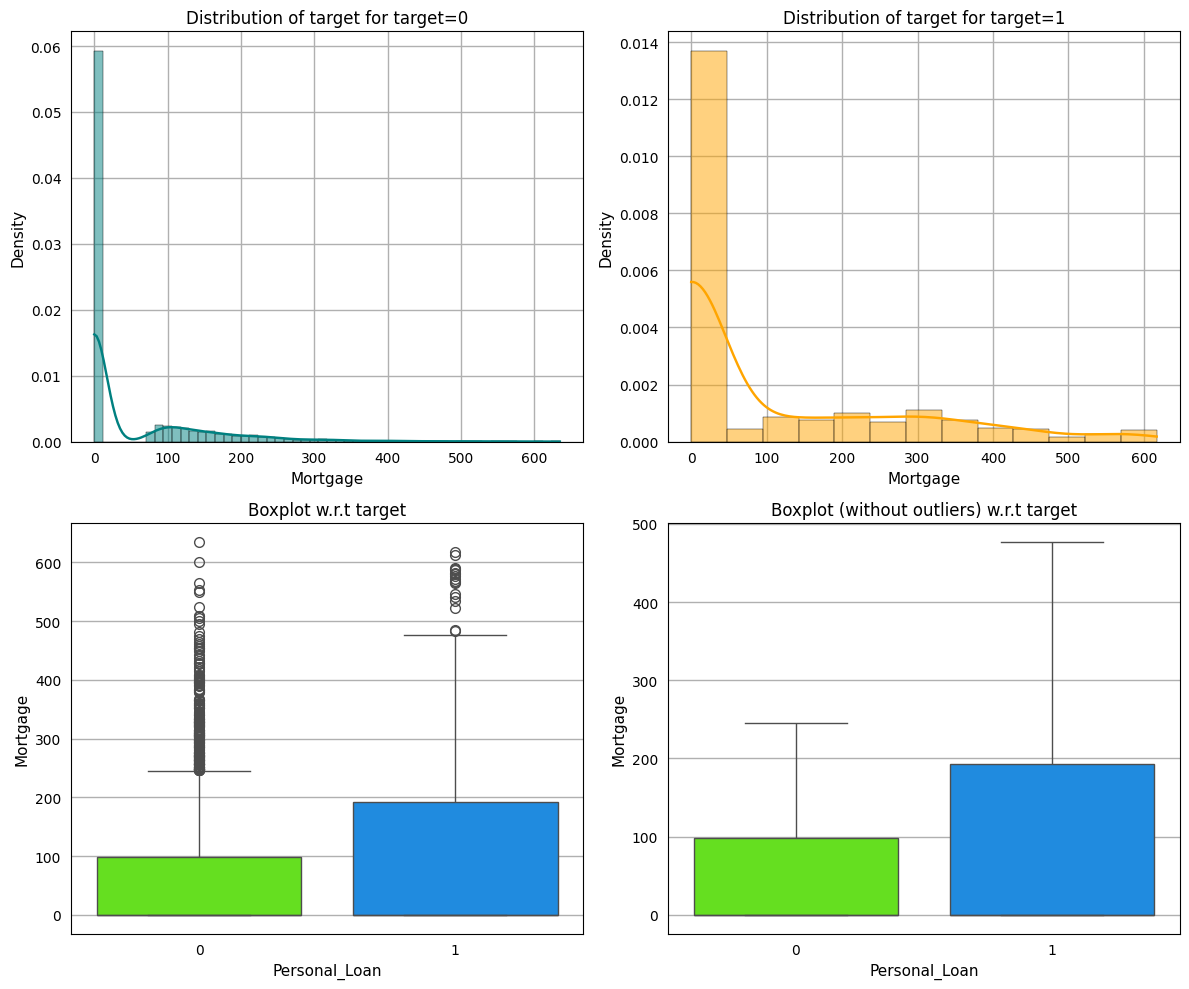

In [ ]:
distribution_plot_wrt_target(df,'Mortgage','Personal_Loan')

- The customers paying mortage are more likely to accept personal loan, yet As the variable distribution is heavily right skewed due to the high
number of customers not paying mortgage, we will plot the distribution of the customers paying mortgage only which are consolidated in the
dataframe mortgage.
- This will give us a better insight on the mortgage mean value for customers accepting vs custmers not accepting a personal loan

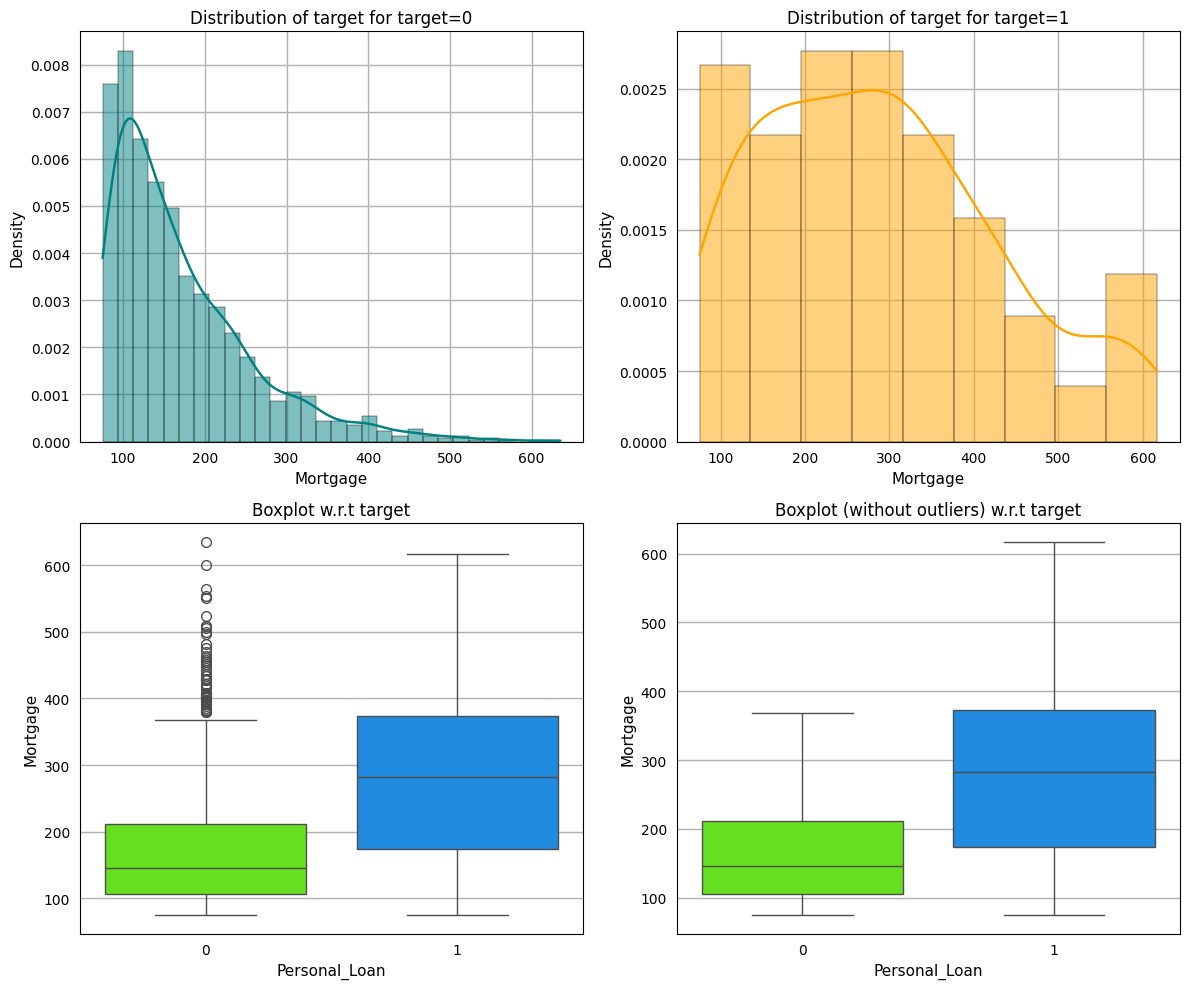

In [ ]:
mortgage =df[df['Mortgage']>0]
distribution_plot_wrt_target(mortgage,'Mortgage','Personal_Loan')

- From the above plots it shows that the mean value of mortgage paid by customers not accepting a personal loan is approx USD 150K USD
which is much less than the mean value of customers accepting personal loan of approx USD 290K.
-  As the mortgage value increase, the
customer is more likely to accept a personal loan

CCAvg VS Personal_Loan

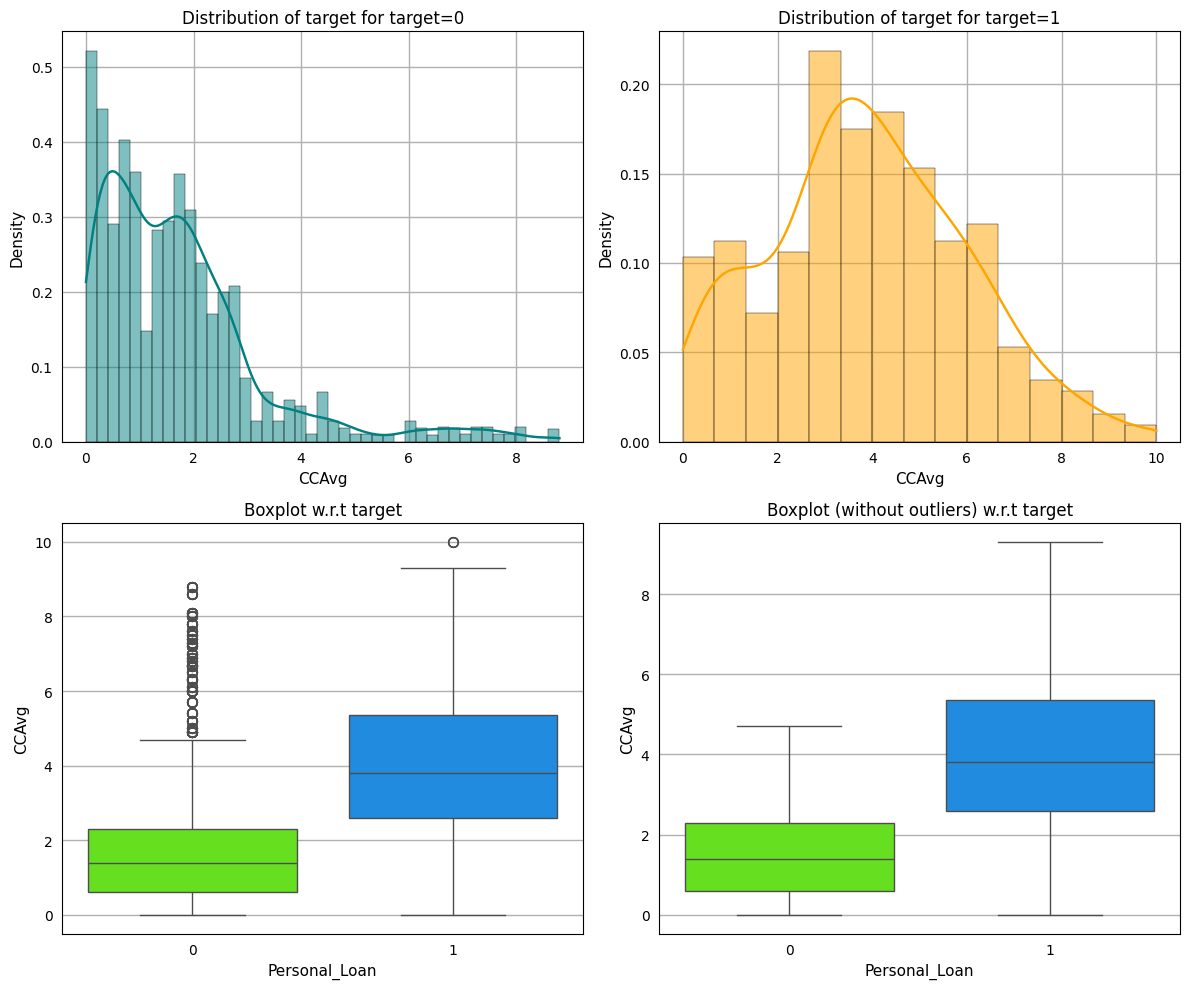

In [ ]:
distribution_plot_wrt_target(df,'CCAvg','Personal_Loan')

The mean value of CCAvg of customers not accepting a personal loan is approx USD 1.6 K USDmuch less than the mean value of customers
accepting personal loan of approx USD 4K. hence customers who accept personal loan spends more money on monthly basis

**Plotting the target VS distribution of categorical variables**


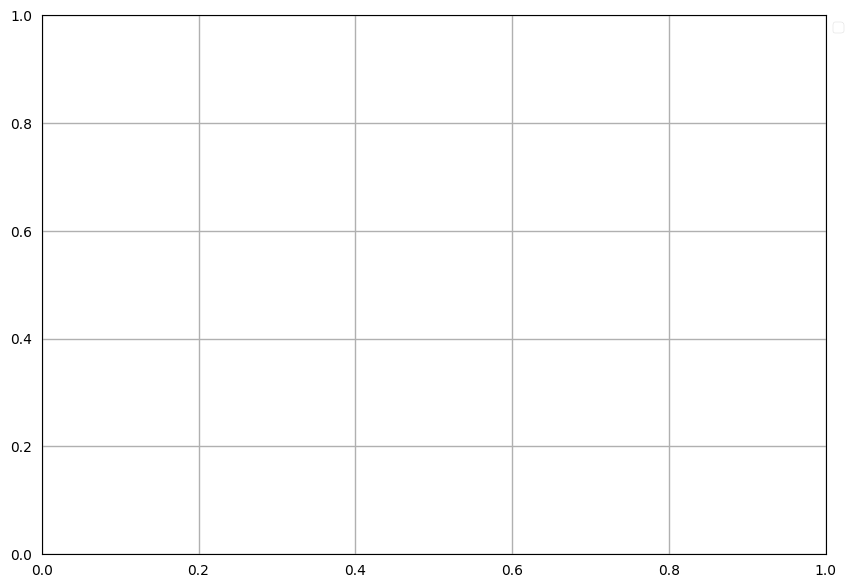

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
  """
  Print the category counts and plot a stacked bar chart

  data: dataframe
  predictor: independent variable
  target: target variable
  """
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
      by=sorter, ascending=False
)

  print(tab1)
  print("-" * 120)
  tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
     by=sorter, ascending=False
)
  tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
  plt.legend(
   loc="lower left", frameon=False,
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
 #function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Family VS Personal_Loan**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


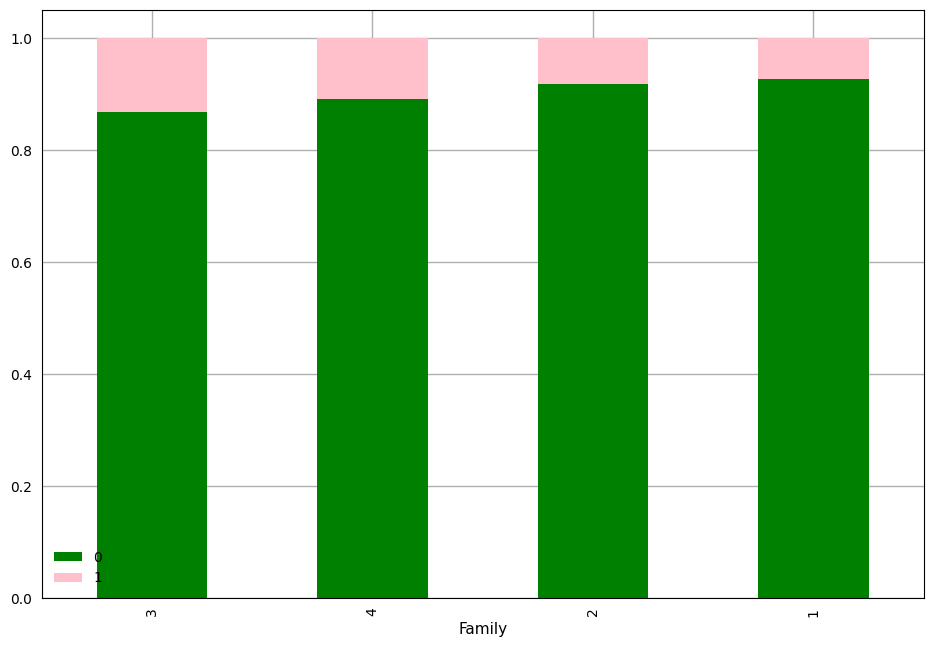

In [ ]:
stacked_barplot(df,'Family','Personal_Loan')

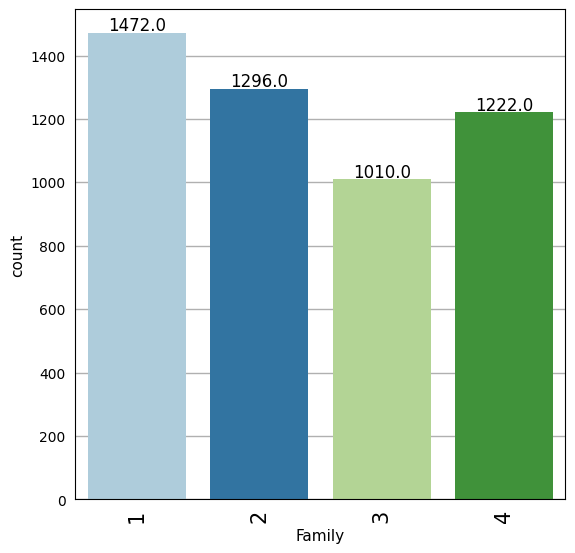

In [ ]:
labeled_barplot(df,'Family','Personal_Loan')

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


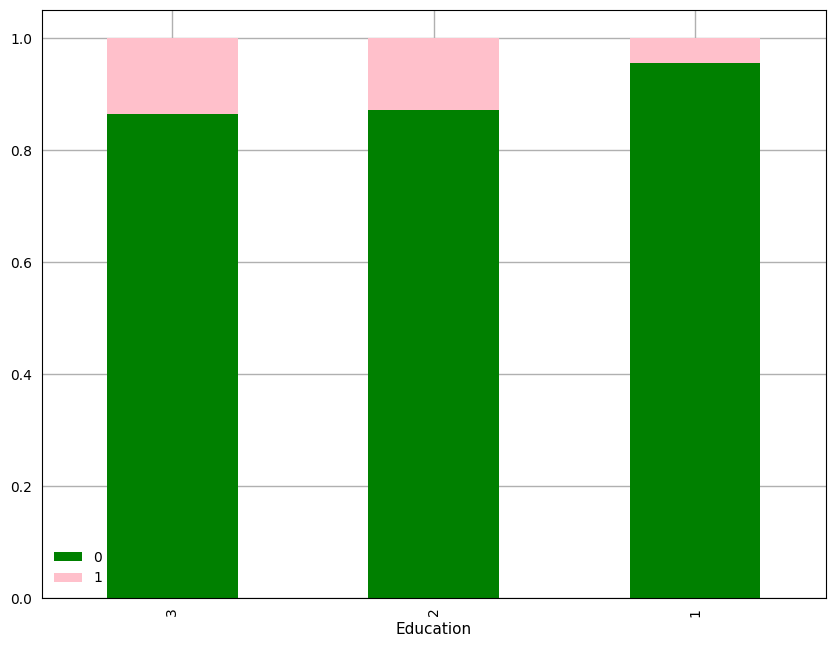

In [ ]:
stacked_barplot(df,'Education','Personal_Loan')

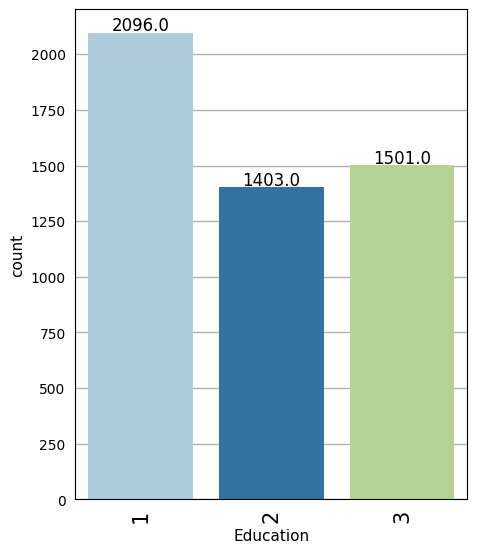

In [ ]:
labeled_barplot(df,'Education','Personal_Loan')

CD_Account','Personal_Loan'

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


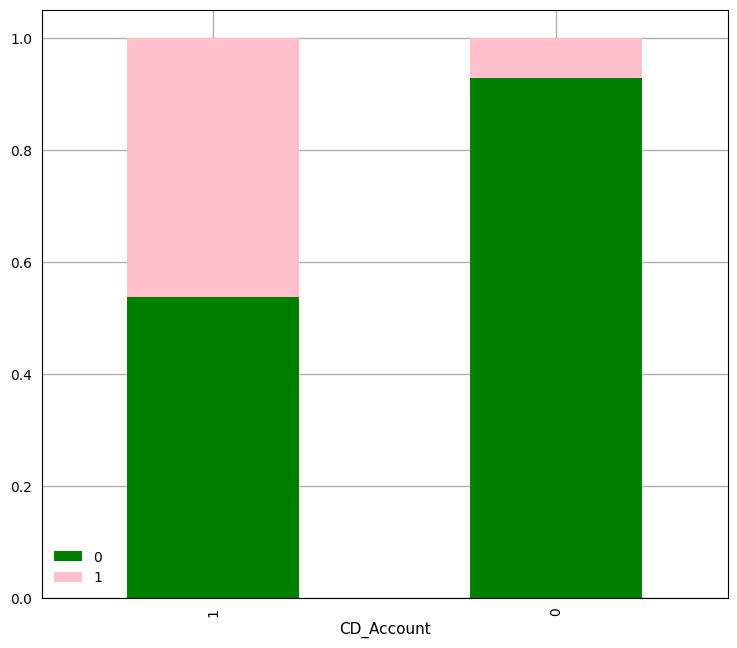

In [ ]:
stacked_barplot(df,'CD_Account','Personal_Loan')

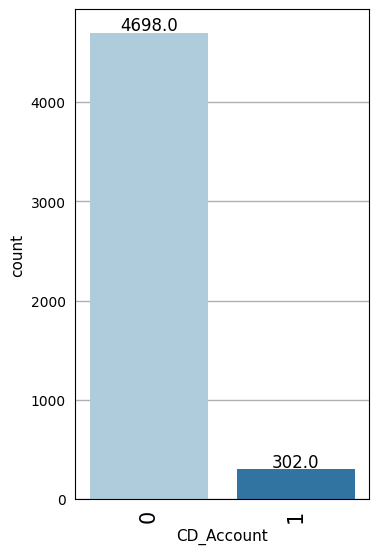

In [ ]:
labeled_barplot(df,'CD_Account','Personal_Loan')

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


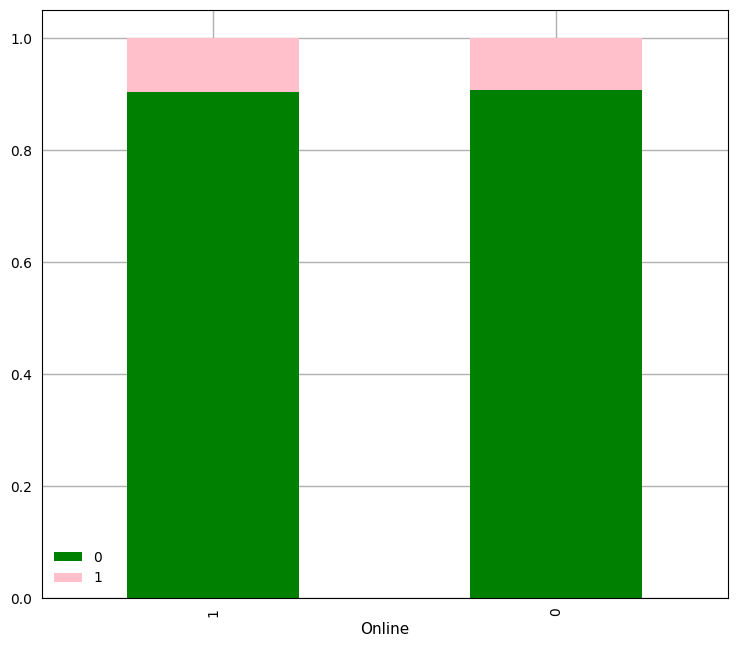

In [ ]:
stacked_barplot(df,'Online','Personal_Loan')

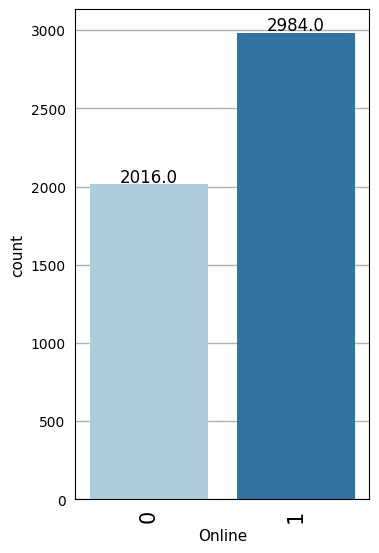

In [ ]:
labeled_barplot(df,'Online','Personal_Loan')

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


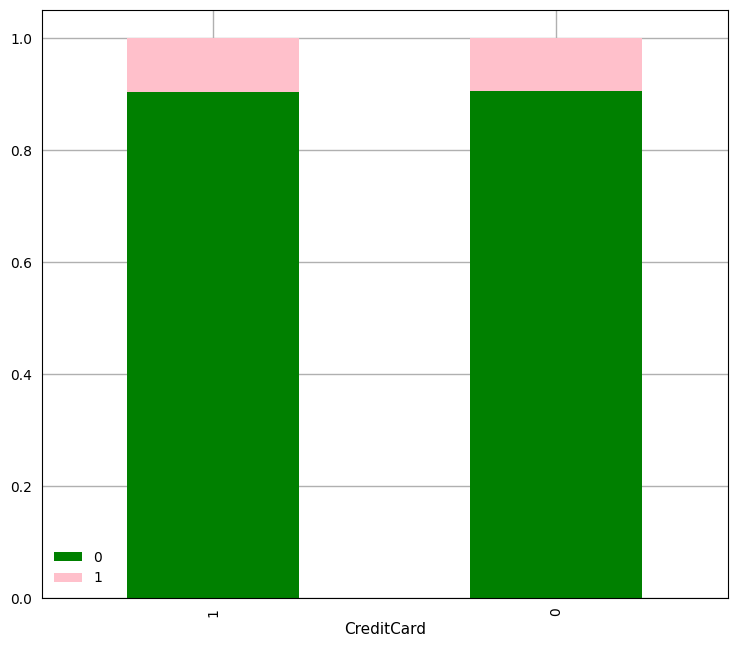

In [ ]:
stacked_barplot(df,'CreditCard','Personal_Loan')


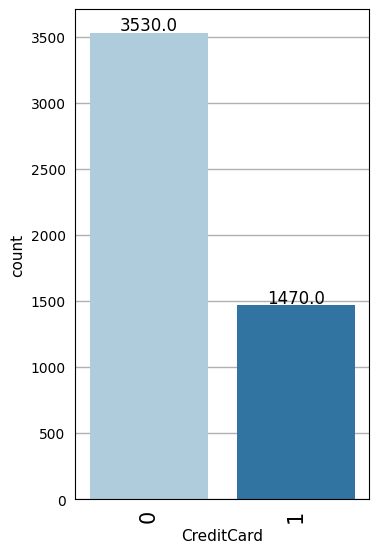

In [ ]:
labeled_barplot(df,'CreditCard','Personal_Loan')

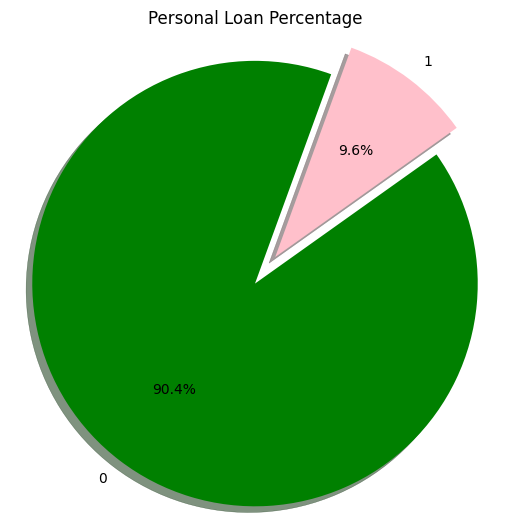

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5,5))
explode = (0, 0.15)
index = df['Personal_Loan'].value_counts().index
size = df['Personal_Loan'].value_counts().values
ax1.pie(size, labels=index, explode=explode, autopct='%1.1f%%',
shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

9.6%of customer received loan.


In [ ]:
df.describe(include='all').T

count       mean         std    min    25%    50%  \
Age                 5000.0  45.338400   11.463166  23.00  35.00  45.00   
Experience          5000.0  20.134600   11.415189   0.00  10.00  20.00   
Income              5000.0   6.147912    3.836233   0.67   3.25   5.33   
Family              5000.0   2.396400    1.147663   1.00   1.00   2.00   
CCAvg               5000.0   1.937938    1.747659   0.00   0.70   1.50   
Education           5000.0   1.881000    0.839869   1.00   1.00   2.00   
Mortgage            5000.0  56.498800  101.713802   0.00   0.00   0.00   
Personal_Loan       5000.0   0.096000    0.294621   0.00   0.00   0.00   
Securities_Account  5000.0   0.104400    0.305809   0.00   0.00   0.00   
CD_Account          5000.0   0.060400    0.238250   0.00   0.00   0.00   
Online              5000.0   0.596800    0.490589   0.00   0.00   1.00   
CreditCard          5000.0   0.294000    0.455637   0.00   0.00   0.00   

                       75%     max  
Age                  55.00   67.00  
Experience           30.00   43.00  
Income                8.17   18.67  
Family                3.00    4.00  
CCAvg                 2.50   10.00  
Education             3.00    3.00  
Mortgage            101.00  635.00  
Personal_Loan         0.00    1.00  
Securities_Account    0.00    1.00  
CD_Account            0.00    1.00  
Online                1.00    1.00  
CreditCard            1.00    1.00

**Key Observations On the EDA Analysis**

- The min Age is 23 , max is 67 , Average is 45 Years old - Data seems is slightly fitting a uniform distribution. The min Experience is 0 years,
the max is 43 and the mean is approximatly 20 years.
- The min CCAvg is USD 0k (which can be reflecting customers who do not own credit
cards), max is USD 1.9K and average is USD 10K 369% of the customers are not paying mortage and the remainig 31% paying minimum
value of approx 99K to max value of 635K and mean value between USD 180-200K for mortage
- It is observed that customers who use credit cards issued by other banks and those who do not are almost equally likely to accept
personal loans
It is observed that customers who use iternet banking services and who do not use internet banking services are almost equally likely to
accept personal loans
- It is observed that customers with Security account are more willing to accept a personal loan
It is observed that famillies of size 3 or 4 have more proportion of accepting a personal loan. Hence as the familly size grows, customers
are more willing to accept personal loans
- The correlation heatmap supports the correlation observed in the pairplot where:
- The correlation between Age and Experience is very high (value = 0.99) The correlation between Income and CCAvg is low (value = 0.65)
- All
other correlation values are quiet small for consideration
expected target dependencies Low importance is expected for the variables: Age, Experience, Credit card and Online High to mediam
importance is expected for Income, Familly, CCAvg, Education, Mortgage, Security Account and CD_Account


Outliers in the mortgage:

In [ ]:
Outlier_mortgage=df[(df['Mortgage']>247) & (df['Personal_Loan']==0)].style.highlight_max(color = 'red', axis = 1,subset=['Mortgage'])
Outlier_mortgage

In [ ]:
Q1 = df.quantile(0.25 ) # Complete the code to find the 25th percentile
print("25th percentile:", Q1)

25th percentile: Age                   35.00
Experience            10.00
Income                 3.25
Family                 1.00
CCAvg                  0.70
Education              1.00
Mortgage               0.00
Personal_Loan          0.00
Securities_Account     0.00
CD_Account             0.00
Online                 0.00
CreditCard             0.00
Name: 0.25, dtype: float64


In [ ]:
Q3 = df.quantile(0.75 ) # Complete the code to find the 75th percentile
print("75th percentile:", Q3)


75th percentile: Age                    55.00
Experience             30.00
Income                  8.17
Family                  3.00
CCAvg                   2.50
Education               3.00
Mortgage              101.00
Personal_Loan           0.00
Securities_Account      0.00
CD_Account              0.00
Online                  1.00
CreditCard              1.00
Name: 0.75, dtype: float64


In [ ]:
IQR = Q3 - Q1
print(IQR)


Age                    20.00
Experience             20.00
Income                  4.92
Family                  2.00
CCAvg                   1.80
Education               2.00
Mortgage              101.00
Personal_Loan           0.00
Securities_Account      0.00
CD_Account              0.00
Online                  1.00
CreditCard              1.00
dtype: float64


In [ ]:
lower = Q1 - 1.5 * IQR # Finding lower and upper bounds for all values. All values outside these bounds are outliers
print(lower)


Age                     5.00
Experience            -20.00
Income                 -4.13
Family                 -2.00
CCAvg                  -2.00
Education              -2.00
Mortgage             -151.50
Personal_Loan           0.00
Securities_Account      0.00
CD_Account              0.00
Online                 -1.50
CreditCard             -1.50
dtype: float64


In [ ]:
upper = Q3 + 1.5 * IQR
print(upper)


Age                    85.00
Experience             60.00
Income                 15.55
Family                  6.00
CCAvg                   5.20
Education               6.00
Mortgage              252.50
Personal_Loan           0.00
Securities_Account      0.00
CD_Account              0.00
Online                  2.50
CreditCard              2.50
dtype: float64


- Data Preparation for Modeling
The objective is to predict whether a liability customer will buy personal loans.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on
the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance


In [ ]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

This dataset used to build the model. For this, we first determine the values of X and Y and then check the different models in order

In [ ]:
 #define x and y
x = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan'].values.reshape(-1,1)

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (5000, 11)
Shape of y: (5000, 1)


In [ ]:
# Separate independent and dependent variable
X = df.drop(["Personal_Loan", "Experience"], axis=1)
Y = df["Personal_Loan"]
print(f"Column Experience and Personal_Loan must already be dropped.")
x.head(10)

Column Experience and Personal_Loan must already be dropped.


Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1    4.08       4    1.6          1         0   
1   45          19    2.83       3    1.5          1         0   
2   39          15    0.92       1    1.0          1         0   
3   35           9    8.33       1    2.7          2         0   
4   35           8    3.75       4    1.0          2         0   
5   37          13    2.42       4    0.4          2       155   
6   53          27    6.00       2    1.5          2         0   
7   50          24    1.83       1    0.3          3         0   
8   35          10    6.75       3    0.6          2       104   
9   34           9   15.00       1    8.9          3         0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
5                   0           0       1           0  
6                   0           0       1           0  
7                   0           0       0           1  
8                   0           0       1           0  
9                   0           0       0           0

In [ ]:
df_dummies = pd.get_dummies(df, columns=['Education' ], drop_first=True)
df_dummies.head()


Age  Experience  Income  Family  CCAvg  Mortgage  Personal_Loan  \
0   25           1    4.08       4    1.6         0              0   
1   45          19    2.83       3    1.5         0              0   
2   39          15    0.92       1    1.0         0              0   
3   35           9    8.33       1    2.7         0              0   
4   35           8    3.75       4    1.0         0              0   

   Securities_Account  CD_Account  Online  CreditCard  Education_2  \
0                   1           0       0           0        False   
1                   1           0       0           0        False   
2                   0           0       0           0        False   
3                   0           0       0           0         True   
4                   0           0       0           1         True   

   Education_3  
0        False  
1        False  
2        False  
3        False  
4        False

In [ ]:
 #Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape) # Complete the code to get the shape of train data
print("Shape of test set : ", X_test.shape)
# Complete the code to get the shape of test data

Shape of Training set :  (3500, 10)
Shape of test set :  (1500, 10)


In [ ]:
print("Percentage is of classes in Training set:")
print(pd.Series(y_train.flatten()).value_counts(normalize = True))

Percentage is of classes in Training set:
0    0.905429
1    0.094571
Name: proportion, dtype: float64


In [ ]:
print("Percentage of classes in test set:")
print(pd.Series(y_test.flatten()).value_counts(normalize = True))



Percentage of classes in test set:
0    0.900667
1    0.099333
Name: proportion, dtype: float64


**Model Building**
**Model Evaluation Criterion**
**Model can make wrong predictions as**:
- Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity
Which case is more important?
-Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to
take the personal loan.
** How to reduce this loss i.e need to reduce False Negatives?**
- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be
on increasing Recall or minimizing the false negatives.
** Model Building: Logistic Regression**
- First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each
model.
- The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
The  confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Build Logistic Regression Model**


In [ ]:
lg = LogisticRegression(random_state=1)
## Complete the code to Fit the logistic Regression model on X_train and y_train
model = lg.fit(X_train, y_train) # Pass X_train and y_train as separate arguments

**Checking model performance on the training data**


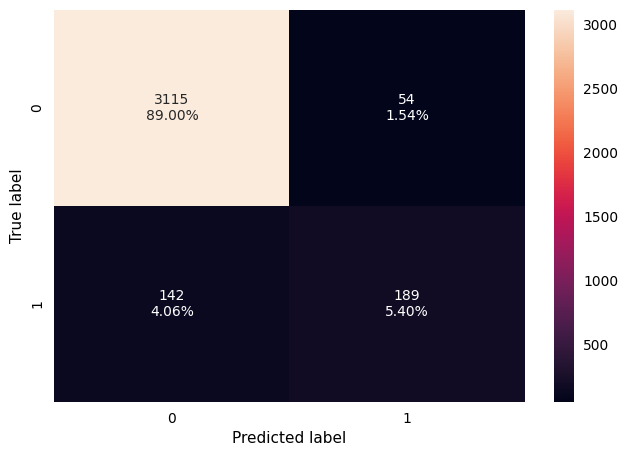

In [ ]:
# create confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)


In [ ]:
# Model Performance on train
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)
print("Training performance:")
log_reg_model_train_perf


Training performance:


Accuracy    Recall  Precision        F1
0     0.944  0.570997   0.777778  0.658537

**Checking Model performace on the test data**

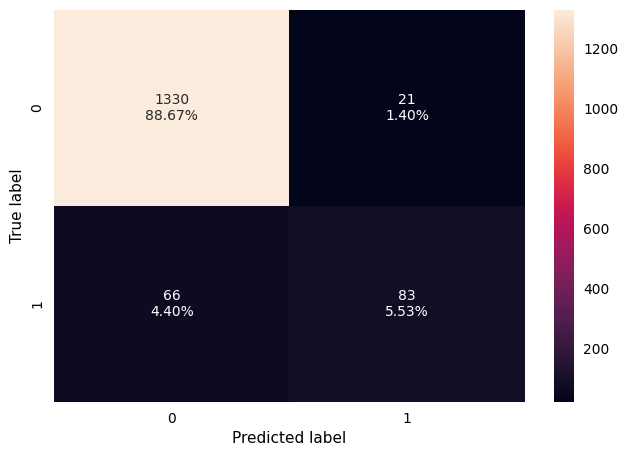

In [ ]:
# complete the code to create confusion matrix on test dat
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test)
print("Training performance:")
log_reg_model_test_perf


Training performance:


Accuracy    Recall  Precision        F1
0     0.942  0.557047   0.798077  0.656126

Model Performance Improvement: Logistic Regression
- ROC-AUC
    - List itemThe area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at
distinguishing between classes.
- ROC-AUC on training set


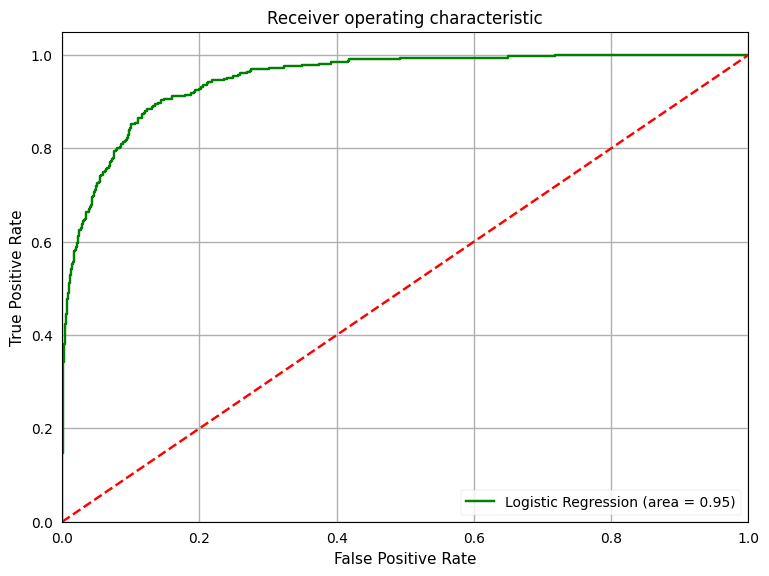

In [ ]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
y_train, lg.predict_proba(X_train)[:, 1]
) # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Optimal threshold using AUC-ROC curve
- Optimal threshold as per AUC-ROC curve
- The optimal cut off would be where tpr is high and fpr is low
- roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.


In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
optimal_idx = np.argmax(
tpr - fpr
) # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.0952046665219231


**Checking model performance on the training data**


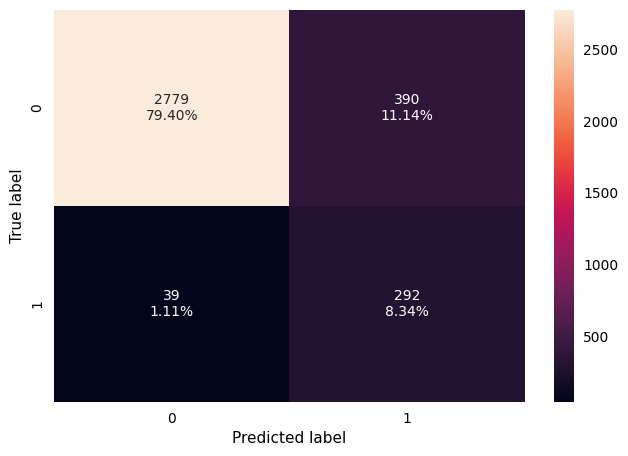

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc


Training performance:


Accuracy    Recall  Precision        F1
0  0.877429  0.882175   0.428152  0.576505

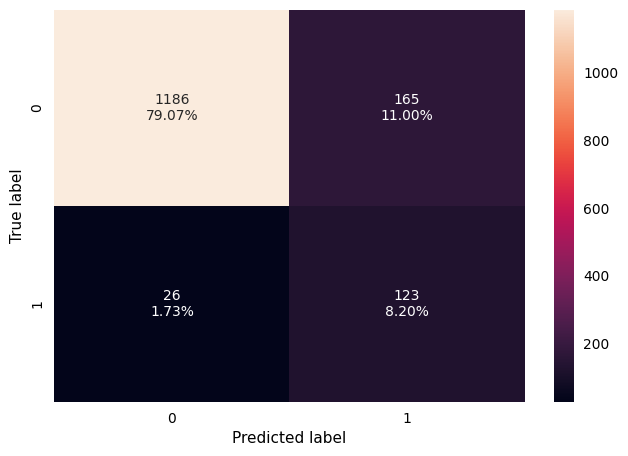

In [ ]:
# Complete the code to create confusion matrix with threshold value on test data
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)


In [ ]:
# Complete the code to get the model performance on the test data using the above threshold value
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc


Test performance:


Accuracy    Recall  Precision        F1
0  0.872667  0.825503   0.427083  0.562929

**Precision-Recall Curve**
Let's use Precision-Recall curve and see if we can find a better threshold
- The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold
as required to improve the model improvement.


In [ ]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

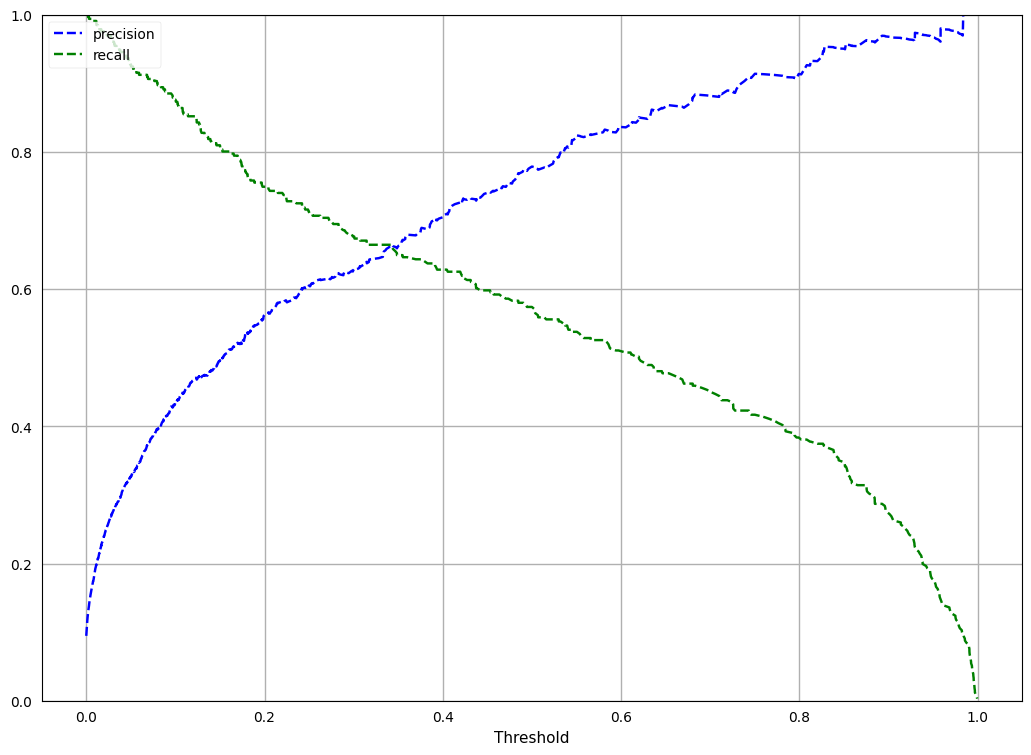

In [ ]:
 #Plot recall precision curve
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


In [ ]:
# Complete the code to set the threshold by looking into above curve
thresholds

array([1.99951094e+00, 9.99510937e-01, 9.83858673e-01, 9.83358232e-01,
       9.58488611e-01, 9.58429340e-01, 9.29684485e-01, 9.29567041e-01,
       8.92794918e-01, 8.84773087e-01, 8.75331440e-01, 8.65457759e-01,
       8.52278669e-01, 8.51220187e-01, 8.28286725e-01, 8.27443793e-01,
       8.26621439e-01, 8.20198715e-01, 8.12846070e-01, 8.11980009e-01,
       8.08291027e-01, 8.02112928e-01, 7.99281513e-01, 7.96877380e-01,
       7.50102260e-01, 7.46046905e-01, 7.43323704e-01, 7.27844366e-01,
       7.19306161e-01, 7.12704823e-01, 7.10246656e-01, 7.10026045e-01,
       6.83029116e-01, 6.80413673e-01, 6.80383052e-01, 6.70487017e-01,
       6.53427116e-01, 6.46450625e-01, 6.45738675e-01, 6.39615861e-01,
       6.34374431e-01, 6.29451492e-01, 6.20123018e-01, 6.20104331e-01,
       6.19943236e-01, 6.16749481e-01, 6.12370067e-01, 6.11516535e-01,
       6.10615352e-01, 6.05307663e-01, 5.97126965e-01, 5.94192892e-01,
       5.81658772e-01, 5.65963981e-01, 5.65909791e-01, 5.58131843e-01,
      

In [ ]:
optimal_threshold_curve

0.4

Checking model performance on training data

Training performance:


Accuracy    Recall  Precision        F1
0      0.94  0.628399   0.705085  0.664537

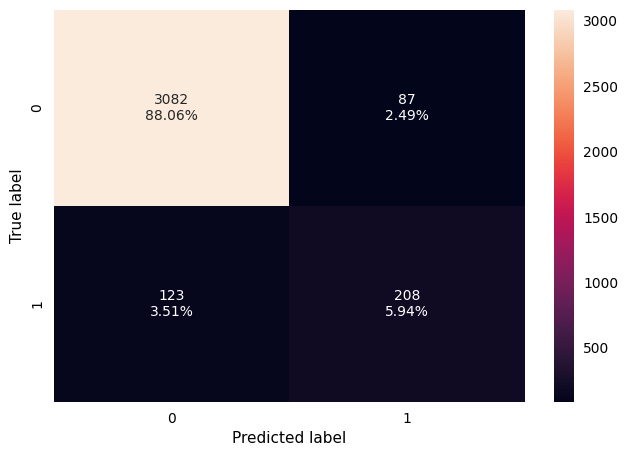

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_curve)
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
     lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve


**Let's check the performance on the test data**

In [ ]:
#Complete the code to get the model performance on the test data using the above threshold value
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0     0.938  0.604027   0.725806  0.659341

Model Performance Comparison: Logistic Regression

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-2 Threshold",
    "Logistic Regression-3 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-2 Threshold  \
Accuracy                      0.944000                         0.877429   
Recall                        0.570997                         0.882175   
Precision                     0.777778                         0.428152   
F1                            0.658537                         0.576505   

           Logistic Regression-3 Threshold  
Accuracy                          0.940000  
Recall                            0.628399  
Precision                         0.705085  
F1                                0.664537

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-2 Threshold",
    "Logistic Regression-23 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-2 Threshold  \
Accuracy                      0.942000                         0.872667   
Recall                        0.557047                         0.825503   
Precision                     0.798077                         0.427083   
F1                            0.656126                         0.562929   

           Logistic Regression-23 Threshold  
Accuracy                           0.938000  
Recall                             0.604027  
Precision                          0.725806  
F1                                 0.659341

**Model Building: Decision Tree**
- First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each
model.
- The model_performance_classification_sklearn function will be used to check the model performance of models. The
confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Build Decision Tree Model**


In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini',
class_weight={0:0.15, 1:0.85},
random_state=1)

**Checking model performance on training data**

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

**Visualizing the Decision Tree**

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


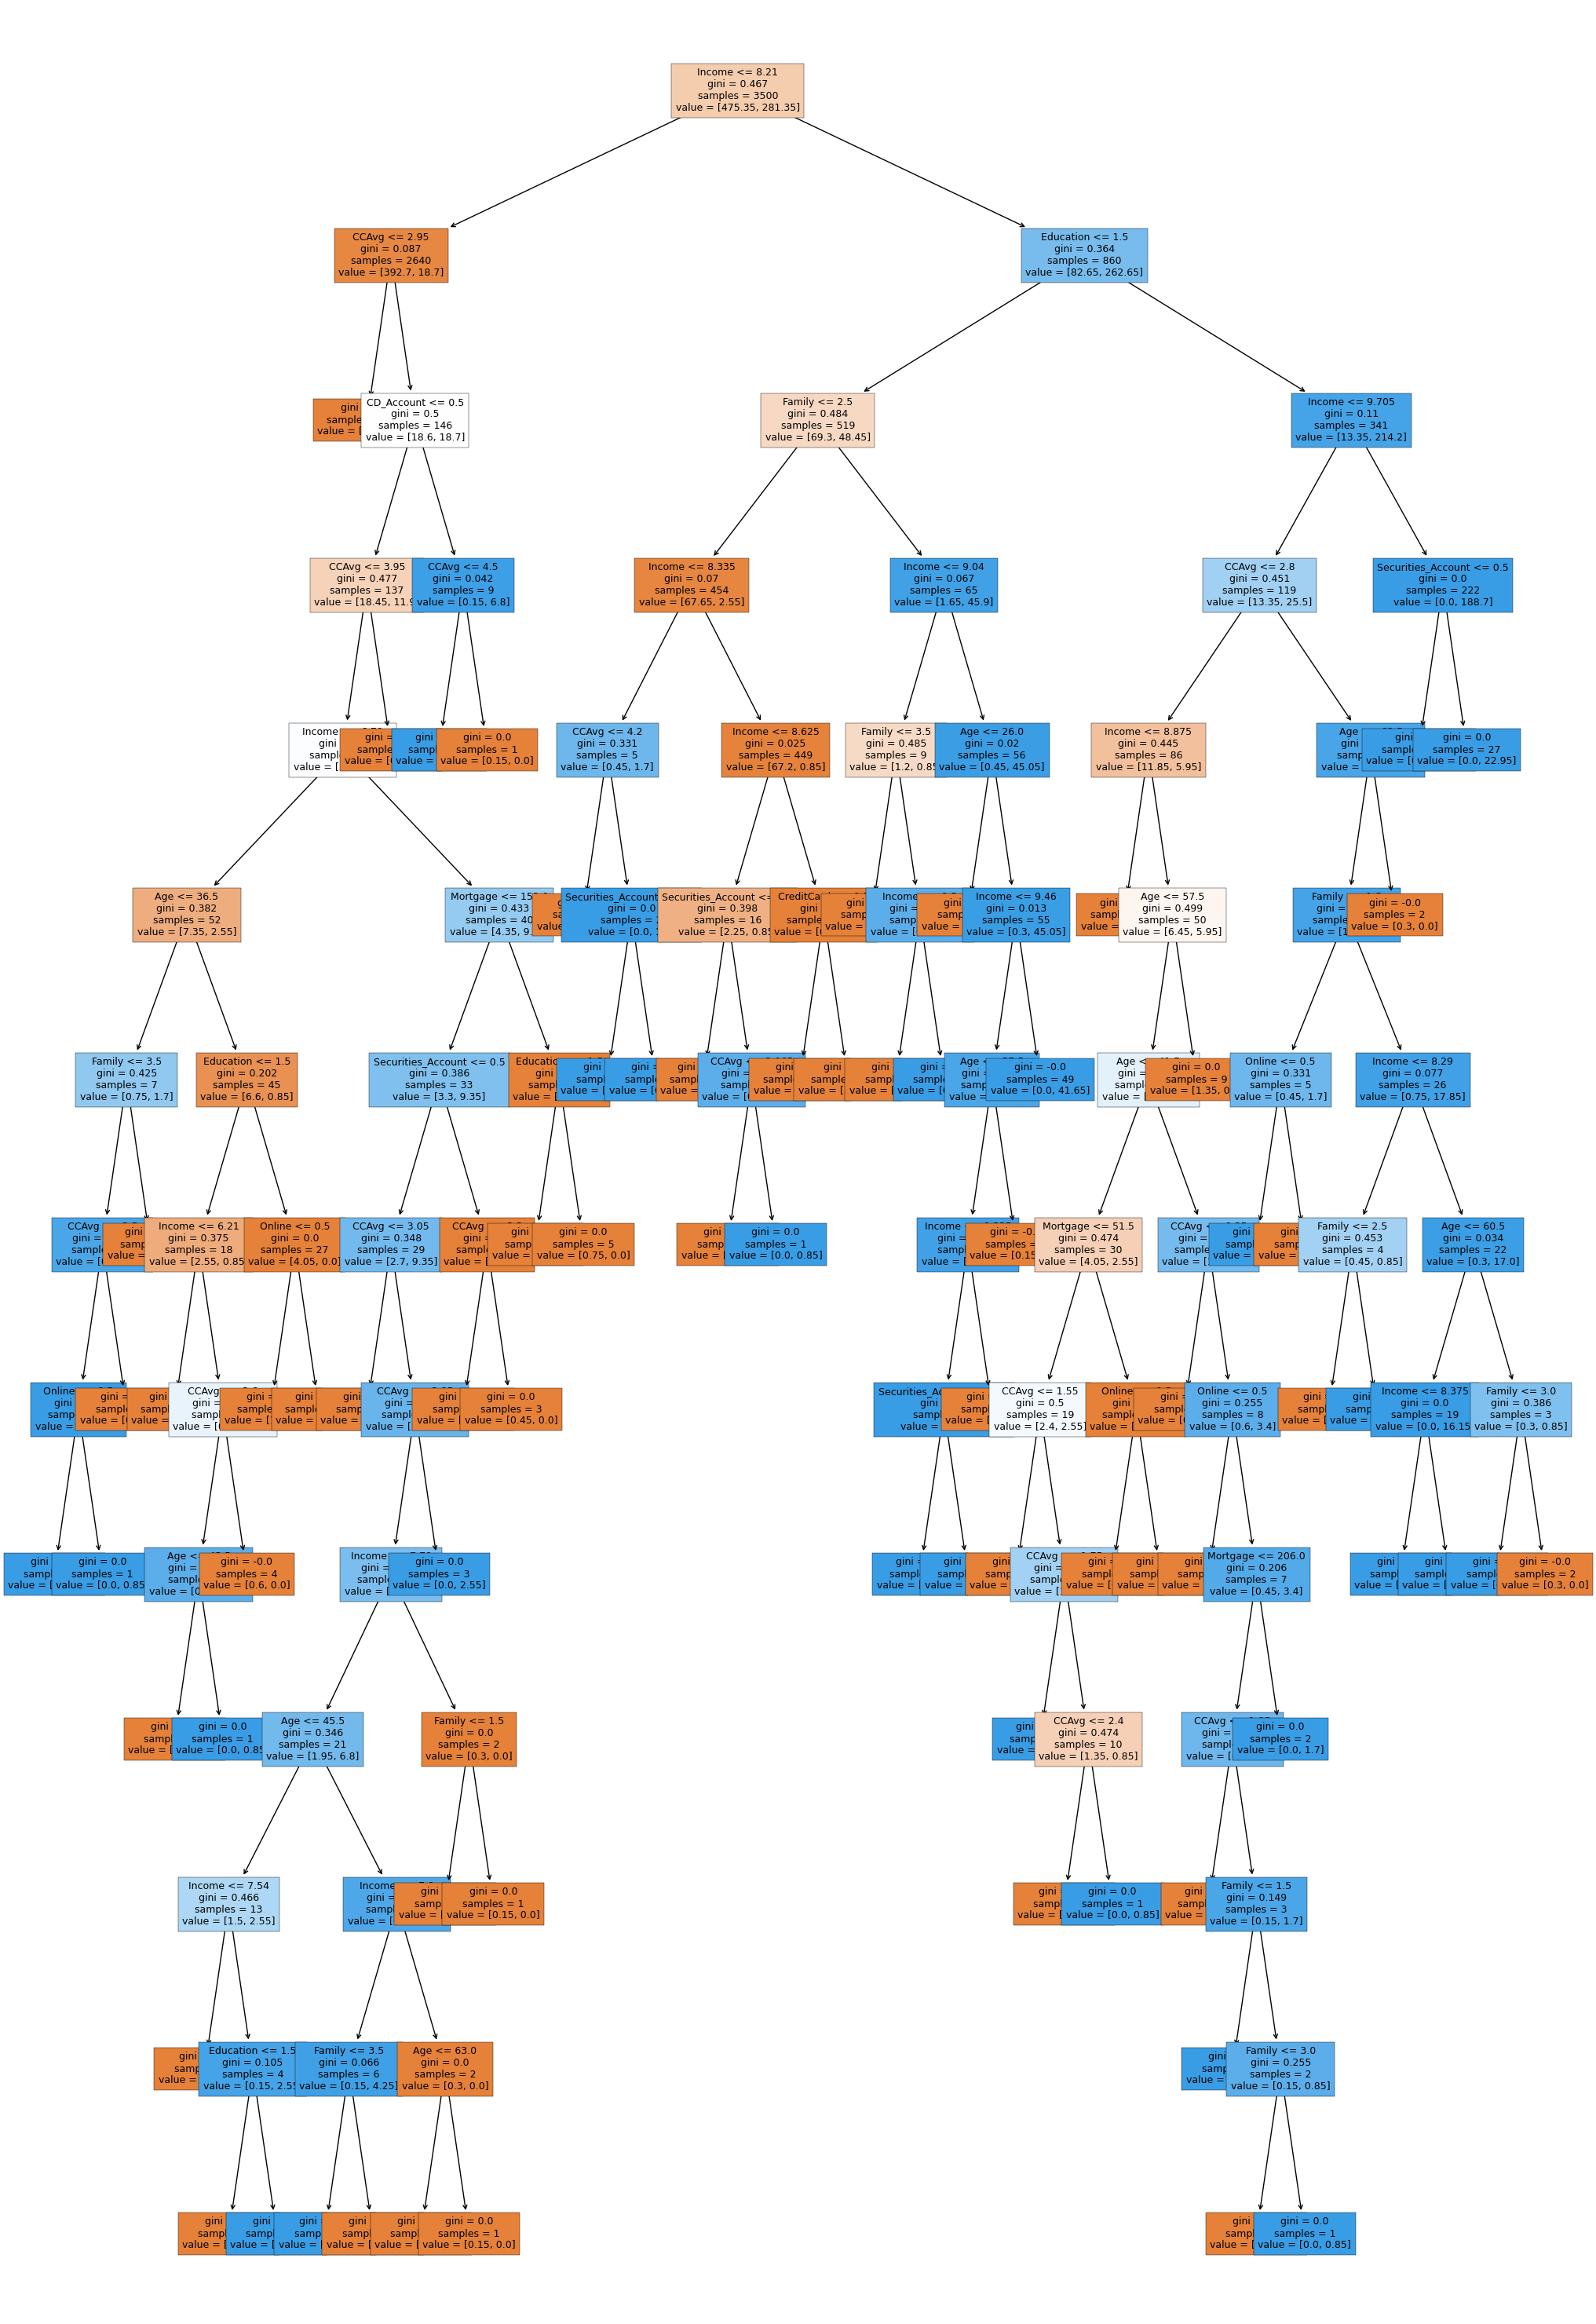

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)
['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
   model,
   feature_names=feature_names,
   filled=True,
   fontsize=9,
   node_ids=False,
   class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
         arrow.set_edgecolor("black")
         arrow.set_linewidth(1)
plt.show()




In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))


|--- Income <= 8.21
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 6.79
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- Income <= 6.21
|   |   |   |   |   |   |   |   |--- weights: [1.80, 0.0

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
pd.DataFrame(
model.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              5.984421e-01
Family              1.475085e-01
Education           1.247195e-01
CCAvg               9.311823e-02
Age                 1.275528e-02
CD_Account          1.099955e-02
Mortgage            5.090297e-03
Securities_Account  4.716203e-03
Online              2.650274e-03
CreditCard          2.447958e-16


### Feature Engineering

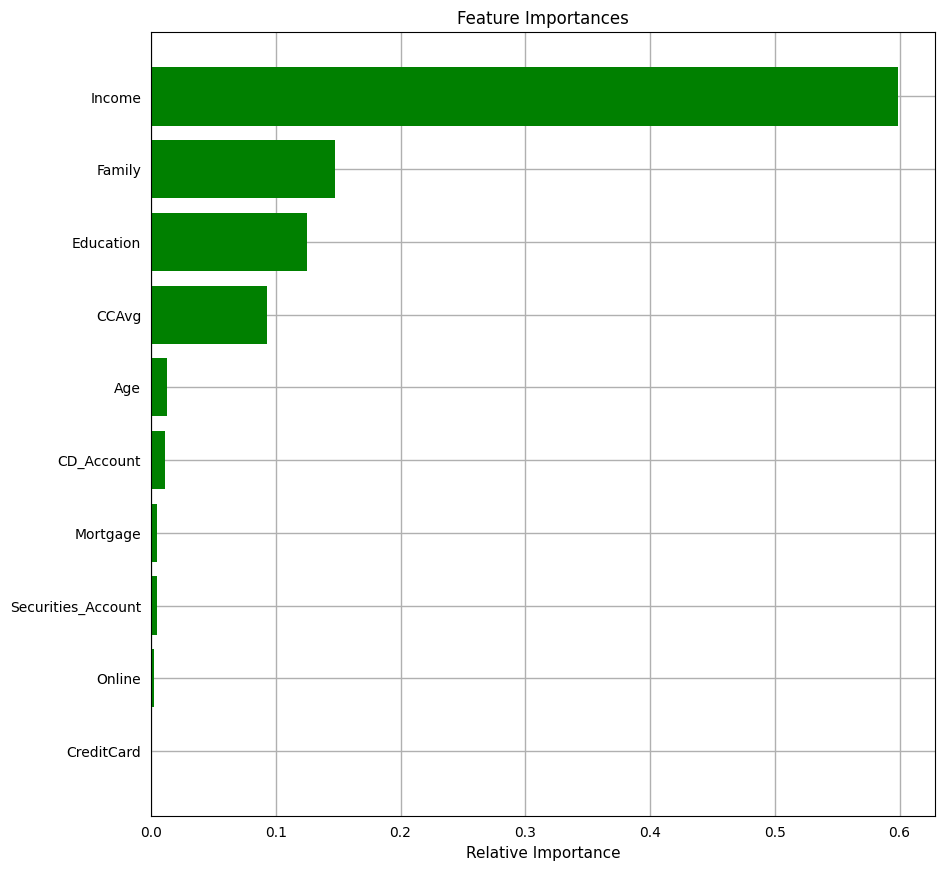

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The feature engineering are income, family,education and CCAvg and age.

 **model performance on test data**

In [ ]:
# Complete the code to get the model formance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test


Accuracy    Recall  Precision       F1
0      0.98  0.879195   0.916084  0.89726

Model Performance Improvement:Decision Tree

Pre_Pruning

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

Checking performance on training data


In [ ]:
y_pred = estimator.predict(X_train)
y_true = y_train # Assuming y_train contains the true labels

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred) # Note the order of arguments is true labels first, then predicted labels

array([[3159,   10],
       [  24,  307]])

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.990286  0.927492   0.968454  0.947531

**Visualizing the Decision Tree**

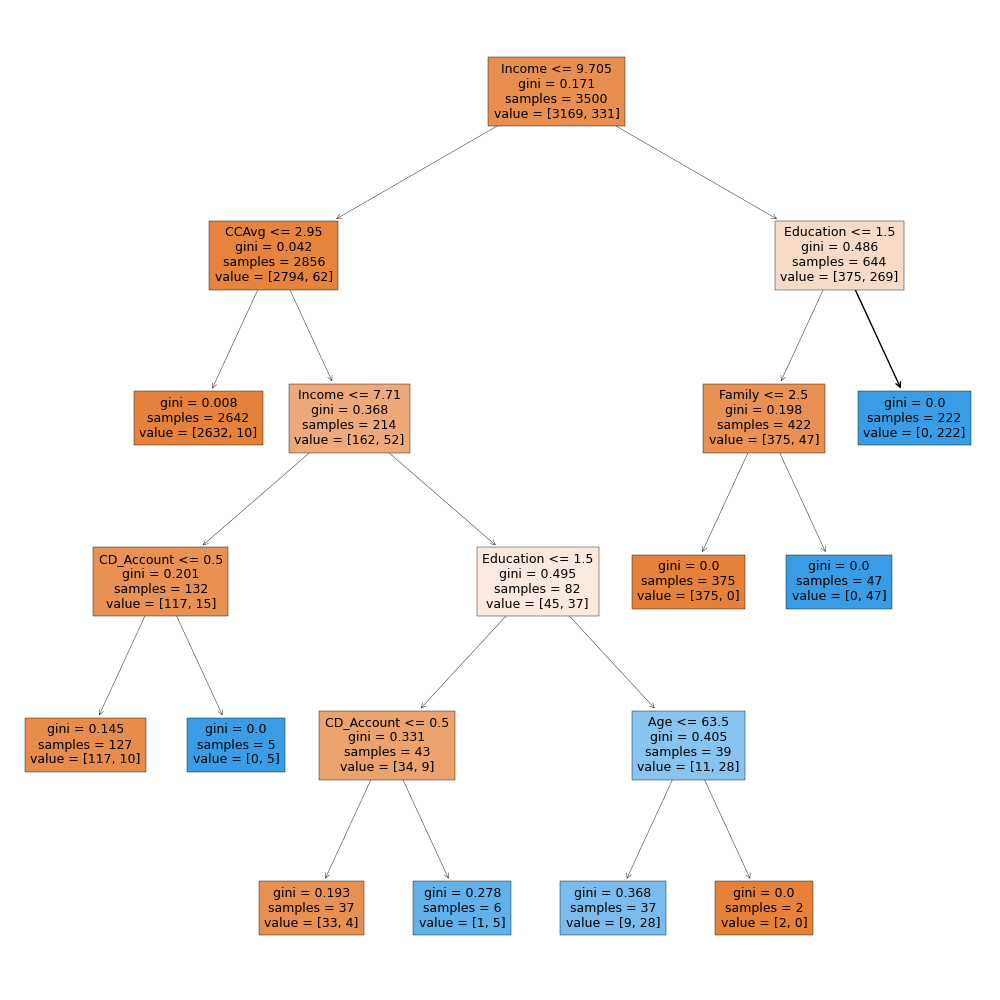

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
     estimator,
     feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
if arrow is not None:
   arrow.set_edgecolor("black")
   arrow.set_linewidth(1)
plt.show()


In [ ]:
#Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 9.70
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 7.71
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  7.71
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|--- Income >  9.70
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
pd.DataFrame(
model.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              5.984421e-01
Family              1.475085e-01
Education           1.247195e-01
CCAvg               9.311823e-02
Age                 1.275528e-02
CD_Account          1.099955e-02
Mortgage            5.090297e-03
Securities_Account  4.716203e-03
Online              2.650274e-03
CreditCard          2.447958e-16


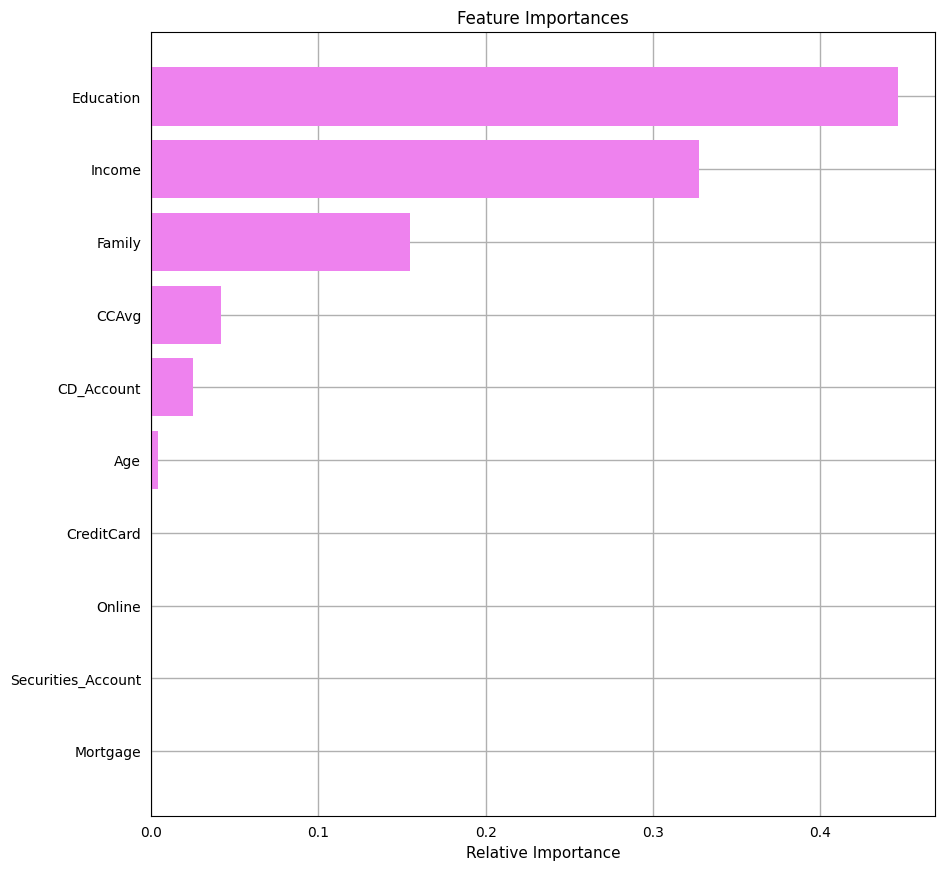

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Checking performance on test data

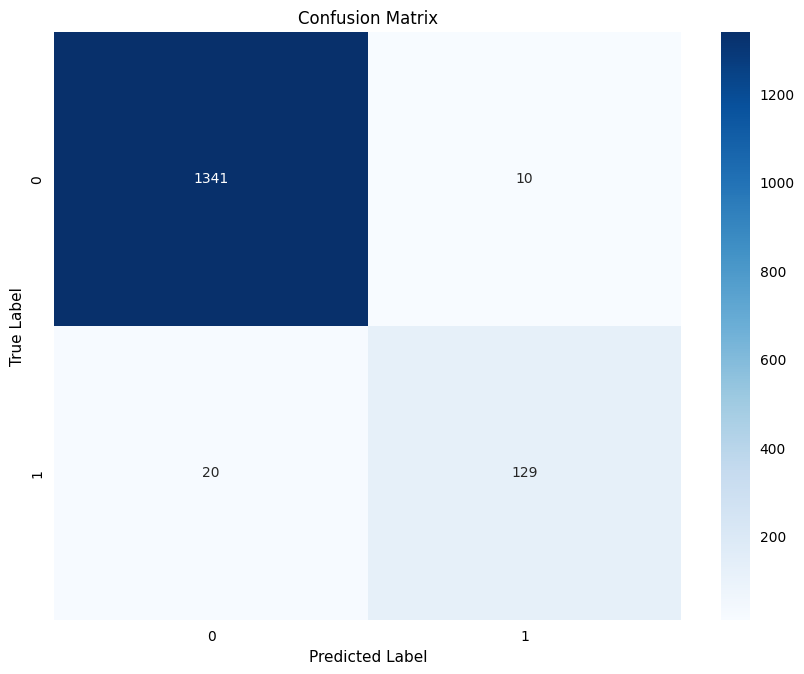

In [ ]:
def confusion_matrix_sklearn(model, X_test, y_test):
    """
    Plots a confusion matrix using sklearn and seaborn.

    Args:
        model: Trained sklearn model.
        X_test: Test features.
        y_test: Test labels.
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

#call the function:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
 #Complete the code to get the model performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0      0.98  0.865772   0.928058  0.895833

In [ ]:
# Complete the code to get the model performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0      0.98  0.865772   0.928058  0.895833

Cost-Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000381    0.004787
8     0.000409    0.006423
9     0.000435    0.006859
10    0.000476    0.007335
11    0.000527    0.007862
12    0.000578    0.010176
13    0.000582    0.010758
14    0.000621    0.011379
15    0.000769    0.014456
16    0.000882    0.017985
17    0.001552    0.019536
18    0.002333    0.021869
19    0.003024    0.024893
20    0.003294    0.028187
21    0.006473    0.034659
22    0.023866    0.058525
23    0.056365    0.171255

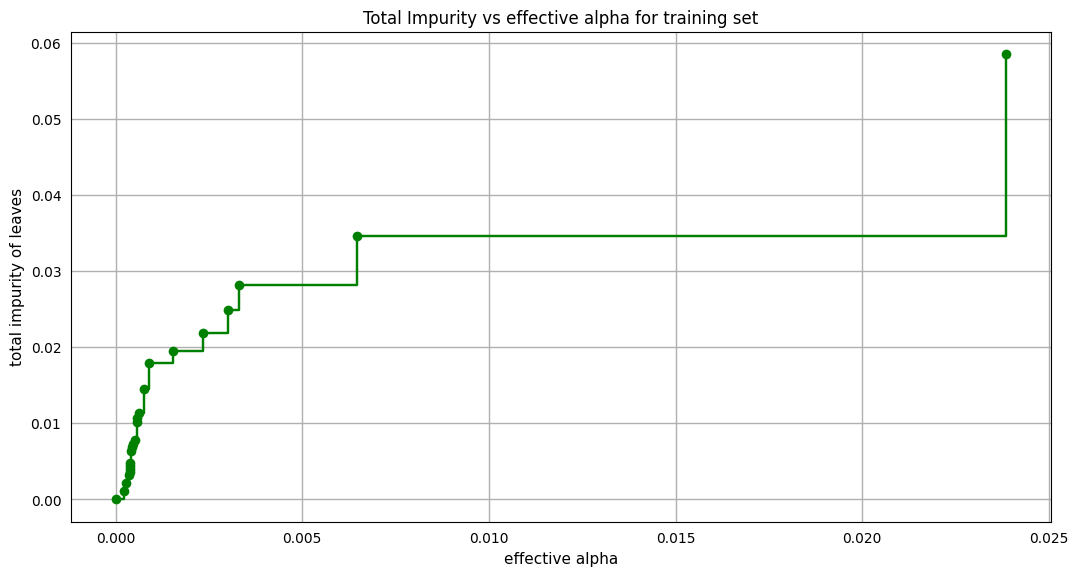

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas.
The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


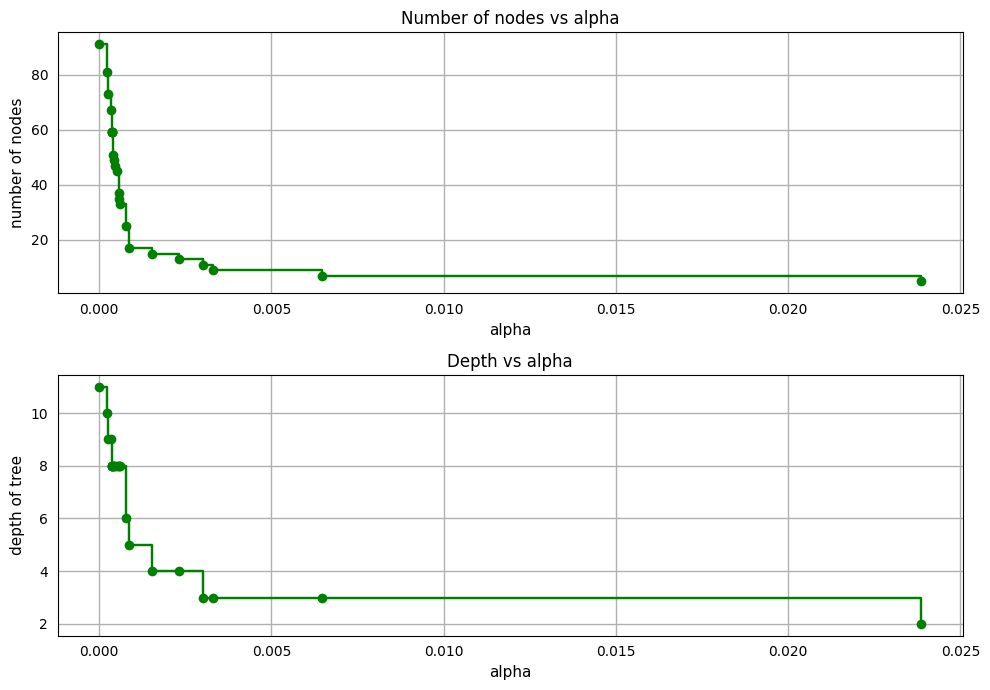

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

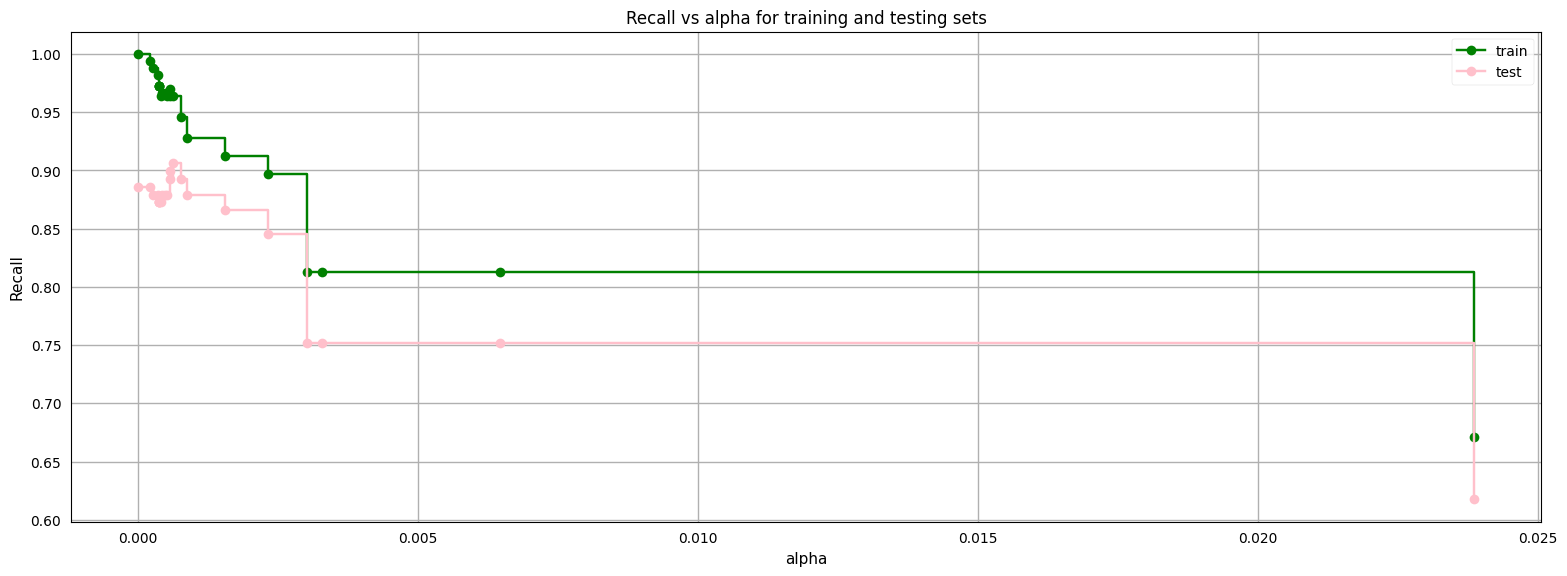

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


Model Performance Comparison: Decision Tree

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)
Accuracy                     1.0                     0.990286
Recall                       1.0                     0.927492
Precision                    1.0                     0.968454
F1                           1.0                     0.947531

 Testing performance comparison

In [ ]:
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)
Accuracy                0.980000                     0.980000
Recall                  0.879195                     0.865772
Precision               0.916084                     0.928058
F1                      0.897260                     0.895833

**Business Problem Overview and Solution Approach**

- AllLife Bank is a US bank with a growing customer base. The majority of its
customers are liability customers (depositors). AllLife Bank wants to convert more of
them into borrowers (asset customers). The recent campaign showed that 9% of
liability customers were converted into borrowers. These results are encouraging, so
the bank wants to devise better target marketing campaigns to increase this success
rate.
-  To identify liability customers that we can convert to asset customers, a predictive
model is created by using the current data set by using explatory data analysis for
the marketing team to help them identify liability customers that are more likely
purchase the loan produc

**Executive Summary**
- Based of the Exploratory Data Analysis, we were able to create and evaluate
predicative models for targeting liability customers to sell loan products to.
-  Based on the pruned decision tree model, we can target the liability customers to
convert asset customers with 99% accuracy.

**EDA:**

 Univariate (Observations)

- Average age is around 45 years old, and the distribution seems normal, no outliers.
- Average experience is around 20 years and has a uniform distribution, no outliers.
- Income is right skewed with many outliers to upside.
- The credit card average, ccavg is right skewed with many outliers to upside.
-  Mortgage is right skewed with many outlier.
-  Mean age is about 45 years old. No outliers.
- Mean experience is about 20 years. No outliers.
- Mean income is about 5K per month.
- Mean ccavg is about 1.5. many outliers to the upside

**Actionable Insights and Business Recommendations**
- Income, education, family, and credit card usage are the most important factors in predicting who is likely to take out a personal
loan.
-  The decision tree model shows that income is the most important factor.
- If a customer's annual income is less than $98k,there
is a good chance they will not take out a personal loan.

- The model also shows that customers with an income greater than
  98k and an education level of 3 or higher(Advanced/Professional) are more likely to take out a personal loan.
- Recommend targeting customers with incomes below
98k.
-  Customers who use the bank's online facilities are more likely to take out a personal loan. We recommend making the website
more user-friendly and encouraging customers who do not use the online facilities to start using them. We also recommend
making the application process for personal loans easier and more user-friendly.
- Customers with separate securities and CD accounts are more likely to take out a personal loan. Customers who use the bank's
online facilities are also more likely to take out a personal loan than those who do not use the online facilities